<a href="https://colab.research.google.com/github/AmyMorrison2/asthma-air-pollution-capstone/blob/main/Final_Methods_Asthma_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Methodology**


## Data Import and Prep

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

asthma_df = pd.read_csv("crude_asthma_2011_2021.csv", dtype={"CountyFIPS": str, "StateFIPS": str})
pollution_df = pd.read_csv("cleaned_data_2011_2021.csv", dtype={"FIPS": str, "State Code": str, "County Code": str})


In [2]:
asthma_df.head()

,StateFIPS,State,CountyFIPS,County,Year,Value,Data Comment,Unnamed: 7
0,04,Arizona,04001,Apache,2011,42.0,NaN,NaN
1,04,Arizona,04001,Apache,2012,41.0,NaN,NaN
2,04,Arizona,04001,Apache,2013,39.3,NaN,NaN
3,04,Arizona,04001,Apache,2014,38.5,NaN,NaN
4,04,Arizona,04001,Apache,2015,39.0,NaN,NaN


In [3]:
asthma_df.shape



(15464, 8)

In [4]:
pollution_df.head()

,State Code,County Code,Arithmetic Mean,Parameter Name,Latitude,Longitude,Units of Measure,Observation Count,FIPS,Year
0,1,3,0.050682,Ozone,30.497478,-87.880258,Parts per million,5609,01003,2011
1,1,3,0.045416,Ozone,30.497478,-87.880258,Parts per million,5864,01003,2011
2,1,3,0.045416,Ozone,30.497478,-87.880258,Parts per million,5864,01003,2011
3,1,3,0.045372,Ozone,30.497478,-87.880258,Parts per million,4149,01003,2011
4,1,3,9.953913,PM2.5 - Local Conditions,30.497478,-87.880258,Micrograms/cubic meter (LC),115,01003,2011


In [5]:
pollution_df.shape

(226136, 10)

In [6]:
pollution_wide = pollution_df.pivot_table(
    index=["FIPS", "Year"],
    columns="Parameter Name",
    values="Arithmetic Mean",
    aggfunc="mean"
).reset_index()

pollution_wide.head()

Parameter Name,FIPS,Year,Nitrogen dioxide (NO2),Ozone,PM2.5 - Local Conditions
0,01003,2011,NaN,0.046721,9.953913
1,01003,2012,NaN,0.043391,9.200826
2,01003,2013,NaN,0.040323,8.383784
3,01003,2014,NaN,0.041925,8.906838
4,01003,2015,NaN,0.040848,8.631579


In [7]:
merged_df = pd.merge(
    asthma_df,
    pollution_wide,
    left_on=["CountyFIPS", "Year"],
    right_on=["FIPS", "Year"],
    how="inner"
)

merged_df = merged_df.drop(columns=["Data Comment", "Unnamed: 7"], errors="ignore")
merged_df.head()

,StateFIPS,State,CountyFIPS,County,Year,Value,FIPS,Nitrogen dioxide (NO2),Ozone,PM2.5 - Local Conditions
0,04,Arizona,04001,Apache,2011,42.0,04001,NaN,NaN,3.286895
1,04,Arizona,04001,Apache,2012,41.0,04001,NaN,NaN,2.821349
2,04,Arizona,04001,Apache,2014,38.5,04001,NaN,NaN,3.022157
3,04,Arizona,04001,Apache,2015,39.0,04001,NaN,NaN,2.739584
4,04,Arizona,04001,Apache,2016,38.2,04001,NaN,NaN,2.383333


In [8]:
demo_df = pd.read_csv("analytic_data2021.csv", dtype={"5-digit FIPS Code": str})

demo_cols = [
    "5-digit FIPS Code",
    "Population raw value",
    "% below 18 years of age raw value",
    "% 65 and older raw value",
    "% Non-Hispanic Black raw value",
    "% Hispanic raw value",
    "% Non-Hispanic White raw value",
    "Median household income raw value",
    "Children in poverty raw value",
    "Some college raw value"
]

demo_df = demo_df[demo_cols]

merged_df = pd.merge(
    merged_df,
    demo_df,
    left_on="CountyFIPS",
    right_on="5-digit FIPS Code",
    how="left"
)

merged_df.head()

/tmp/ipython-input-2059347950.py:1: DtypeWarning: Columns (0,1,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,2

,StateFIPS,State,CountyFIPS,County,Year,Value,FIPS,Nitrogen dioxide (NO2),Ozone,PM2.5 - Local Conditions,5-digit FIPS Code,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic Black raw value,% Hispanic raw value,% Non-Hispanic White raw value,Median household income raw value,Children in poverty raw value,Some college raw value
0,04,Arizona,04001,Apache,2011,42.0,04001,NaN,NaN,3.286895,04001,71887,0.2702157553,0.1576641117,0.0049522167,0.0658811746,0.179935176,35386,0.447,0.5113643072
1,04,Arizona,04001,Apache,2012,41.0,04001,NaN,NaN,2.821349,04001,71887,0.2702157553,0.1576641117,0.0049522167,0.0658811746,0.179935176,35386,0.447,0.5113643072
2,04,Arizona,04001,Apache,2014,38.5,04001,NaN,NaN,3.022157,04001,71887,0.2702157553,0.1576641117,0.0049522167,0.0658811746,0.179935176,35386,0.447,0.5113643072
3,04,Arizona,04001,Apache,2015,39.0,04001,NaN,NaN,2.739584,04001,71887,0.2702157553,0.1576641117,0.0049522167,0.0658811746,0.179935176,35386,0.447,0.5113643072
4,04,Arizona,04001,Apache,2016,38.2,04001,NaN,NaN,2.383333,04001,71887,0.2702157553,0.1576641117,0.0049522167,0.0658811746,0.179935176,35386,0.447,0.5113643072


In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5201 entries, 0 to 5200
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   StateFIPS                          5201 non-null   object 
 1   State                              5201 non-null   object 
 2   CountyFIPS                         5201 non-null   object 
 3   County                             5201 non-null   object 
 4   Year                               5201 non-null   int64  
 5   Value                              5201 non-null   float64
 6   FIPS                               5201 non-null   object 
 7   Nitrogen dioxide (NO2)             1604 non-null   float64
 8   Ozone                              4691 non-null   float64
 9   PM2.5 - Local Conditions           3432 non-null   float64
 10  5-digit FIPS Code                  5201 non-null   object 
 11  Population raw value               5201 non-null   objec

In [10]:
numeric_cols = [
    "Population raw value",
    "% below 18 years of age raw value",
    "% 65 and older raw value",
    "% Non-Hispanic Black raw value",
    "% Hispanic raw value",
    "% Non-Hispanic White raw value",
    "Median household income raw value",
    "Children in poverty raw value",
    "Some college raw value"
]

for col in numeric_cols:
    merged_df[col] = pd.to_numeric(merged_df[col], errors="coerce")

merged_df = merged_df.drop(columns=["5-digit FIPS Code"])
merged_df = merged_df.rename(columns={"Value": "Asthma Rate"})

In [11]:
merged_df.head()

,StateFIPS,State,CountyFIPS,County,Year,Asthma Rate,FIPS,Nitrogen dioxide (NO2),Ozone,PM2.5 - Local Conditions,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic Black raw value,% Hispanic raw value,% Non-Hispanic White raw value,Median household income raw value,Children in poverty raw value,Some college raw value
0,04,Arizona,04001,Apache,2011,42.0,04001,NaN,NaN,3.286895,71887,0.270216,0.157664,0.004952,0.065881,0.179935,35386,0.447,0.511364
1,04,Arizona,04001,Apache,2012,41.0,04001,NaN,NaN,2.821349,71887,0.270216,0.157664,0.004952,0.065881,0.179935,35386,0.447,0.511364
2,04,Arizona,04001,Apache,2014,38.5,04001,NaN,NaN,3.022157,71887,0.270216,0.157664,0.004952,0.065881,0.179935,35386,0.447,0.511364
3,04,Arizona,04001,Apache,2015,39.0,04001,NaN,NaN,2.739584,71887,0.270216,0.157664,0.004952,0.065881,0.179935,35386,0.447,0.511364
4,04,Arizona,04001,Apache,2016,38.2,04001,NaN,NaN,2.383333,71887,0.270216,0.157664,0.004952,0.065881,0.179935,35386,0.447,0.511364


In [12]:
asthma_df["Year"] = asthma_df["Year"].astype(int)
pollution_wide["Year"] = pollution_wide["Year"].astype(int)

asthma_counts = asthma_df.groupby("Year")["CountyFIPS"].nunique()
pollution_counts = pollution_wide.groupby("Year")["FIPS"].nunique()

pollution_complete = pollution_wide.dropna(
    subset=["Nitrogen dioxide (NO2)", "Ozone", "PM2.5 - Local Conditions"]
)
pollution_counts_complete = pollution_complete.groupby("Year")["FIPS"].nunique()

overlaps_any = []
for yr in sorted(set(asthma_df["Year"]).intersection(pollution_wide["Year"])):
    overlap = len(
        set(asthma_df.loc[asthma_df["Year"] == yr, "CountyFIPS"]) &
        set(pollution_wide.loc[pollution_wide["Year"] == yr, "FIPS"])
    )
    overlaps_any.append({
        "Year": yr,
        "Asthma counties": asthma_counts.get(yr, 0),
        "Any-pollution counties": pollution_counts.get(yr, 0),
        "Overlap (any)": overlap
    })

overlaps_complete = []
for yr in sorted(set(asthma_df["Year"]).intersection(pollution_complete["Year"])):
    overlap = len(
        set(asthma_df.loc[asthma_df["Year"] == yr, "CountyFIPS"]) &
        set(pollution_complete.loc[pollution_complete["Year"] == yr, "FIPS"])
    )
    overlaps_complete.append({
        "Year": yr,
        "Asthma counties": asthma_counts.get(yr, 0),
        "Complete-pollution counties": pollution_counts_complete.get(yr, 0),
        "Overlap (all 3)": overlap
    })

summary_any_df = pd.DataFrame(overlaps_any)
summary_complete_df = pd.DataFrame(overlaps_complete)

print("=== Any pollutant ===")
print(summary_any_df)

print("\n=== All three pollutants ===")
print(summary_complete_df)


=== Any pollutant ===
    Year  Asthma counties  Any-pollution counties  Overlap (any)
0   2011             1169                     947            410
1   2012             1179                     926            411
2   2013             1336                     920            437
3   2014             1336                     927            439
4   2015             1290                     930            420
5   2016             1403                     923            476
6   2017             1403                     926            474
7   2018             1614                     926            552
8   2019             1614                     918            549
9   2020             1606                     910            532
10  2021             1514                     912            501

=== All three pollutants ===
    Year  Asthma counties  Complete-pollution counties  Overlap (all 3)
0   2011             1169                          175               93
1   2012             117

In [13]:
merged_df.describe()

,Year,Asthma Rate,Nitrogen dioxide (NO2),Ozone,PM2.5 - Local Conditions,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic Black raw value,% Hispanic raw value,% Non-Hispanic White raw value,Median household income raw value,Children in poverty raw value,Some college raw value
count,5201.000000,5201.000000,1604.000000,4691.000000,3432.000000,5.201000e+03,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000
mean,2016.298981,41.520265,12.303488,0.042913,7.892838,3.345709e+05,0.216445,0.184123,0.082086,0.127772,0.723691,64943.975966,0.164737,0.640925
std,3.135715,18.903197,6.385326,0.005167,2.257684,6.594345e+05,0.032773,0.046792,0.110044,0.149152,0.200322,17014.176892,0.069503,0.099078
min,2011.000000,3.300000,0.686081,0.016609,1.038157,9.500000e+02,0.134048,0.079357,0.000718,0.008095,0.090102,30940.000000,0.024000,0.329129
25%,2014.000000,27.000000,7.436225,0.039475,6.534700,5.343100e+04,0.195828,0.152551,0.012144,0.033854,0.614361,53030.000000,0.114000,0.573315
50%,2017.000000,39.000000,12.065870,0.042602,7.740674,1.434760e+05,0.215309,0.175568,0.035658,0.066806,0.781060,61173.000000,0.157000,0.648383
75%,2019.000000,53.400000,16.464759,0.045874,8.916283,3.757510e+05,0.235766,0.204433,0.104649,0.156082,0.881378,72721.000000,0.204000,0.708283
max,2021.000000,136.000000,36.152890,0.062565,25.374647,1.003911e+07,0.334236,0.397574,0.617832,0.850305,0.971815,135234.000000,0.447000,0.876588


In [14]:
years_required = set(range(2011, 2022))

complete_panel = (
    merged_df
    .dropna(subset=["Asthma Rate", "Nitrogen dioxide (NO2)", "Ozone", "PM2.5 - Local Conditions"])
    .groupby("CountyFIPS")
    .filter(lambda g: set(g["Year"]) >= years_required)
    .sort_values(["CountyFIPS", "Year"])
    .reset_index(drop=True)
)

print(complete_panel["CountyFIPS"].nunique(), "counties retained")
print(complete_panel.shape, "rows total")


76 counties retained
(836, 19) rows total


In [15]:
complete_panel.head()

,StateFIPS,State,CountyFIPS,County,Year,Asthma Rate,FIPS,Nitrogen dioxide (NO2),Ozone,PM2.5 - Local Conditions,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic Black raw value,% Hispanic raw value,% Non-Hispanic White raw value,Median household income raw value,Children in poverty raw value,Some college raw value
0,04,Arizona,04013,Maricopa,2011,39.6,04013,26.410769,0.052865,9.754105,4485414,0.234636,0.155243,0.055937,0.314097,0.545343,68634,0.175,0.656924
1,04,Arizona,04013,Maricopa,2012,44.7,04013,28.043541,0.053320,9.008510,4485414,0.234636,0.155243,0.055937,0.314097,0.545343,68634,0.175,0.656924
2,04,Arizona,04013,Maricopa,2013,39.7,04013,26.214501,0.052597,8.166464,4485414,0.234636,0.155243,0.055937,0.314097,0.545343,68634,0.175,0.656924
3,04,Arizona,04013,Maricopa,2014,41.4,04013,26.753204,0.051493,8.589634,4485414,0.234636,0.155243,0.055937,0.314097,0.545343,68634,0.175,0.656924
4,04,Arizona,04013,Maricopa,2015,41.3,04013,26.523718,0.050338,7.879755,4485414,0.234636,0.155243,0.055937,0.314097,0.545343,68634,0.175,0.656924


To prepare the dataset for analysis, county-level asthma prevalence data (2011–2021) was merged with EPA air pollution data for nitrogen dioxide (NO₂), ozone (O₃), and PM2.5, along with demographic variables from the 2021 County Health Rankings dataset. Consistency was ensured by converting all FIPS codes to string format and standardizing year values as integers. Pollution data was pivoted to a wide format in which each pollutant was represented as a separate column, and demographic variables were converted to numeric types. The dataset was then filtered to include only those counties that reported asthma and all three pollutants for every year from 2011 through 2021. This process resulted in a final complete-case dataset consisting of 76 counties and 836 county-year observations. Population values were retained and will be incorporated during model-specific analysis steps where weighting is appropriate. Region-level models were considered but not pursued, as the dataset had already been narrowed to 76 counties with 836 county-year observations. Further aggregation to regions would have reduced the number of observations and the amount of variation available, limiting statistical power and making results less reliable. Only counties with complete data across all variables and years were retained to ensure consistency in the analysis and to avoid introducing bias from missing information.

## K-Means Clustering

In [16]:
features_for_clustering = [
    "Ozone",
    "PM2.5 - Local Conditions",
    "Nitrogen dioxide (NO2)",
    "Asthma Rate",
    "Population raw value",
    "% below 18 years of age raw value",
    "% 65 and older raw value",
    "% Non-Hispanic Black raw value",
    "% Hispanic raw value",
    "% Non-Hispanic White raw value",
    "Median household income raw value",
    "Children in poverty raw value",
    "Some college raw value"
]

complete_panel[features_for_clustering].isnull().sum()



,0
Ozone,0
PM2.5 - Local Conditions,0
Nitrogen dioxide (NO2),0
Asthma Rate,0
Population raw value,0
% below 18 years of age raw value,0
% 65 and older raw value,0
% Non-Hispanic Black raw value,0
% Hispanic raw value,0
% Non-Hispanic White raw value,0


In [17]:
from sklearn.preprocessing import StandardScaler; scaler = StandardScaler()

X_cluster = complete_panel[features_for_clustering].reset_index(drop=True)

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)



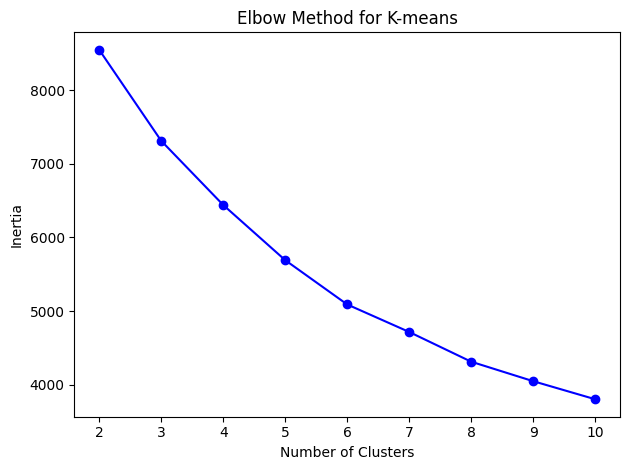

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-means')
plt.tight_layout()
plt.savefig("elbow_method.png", dpi=300)
plt.show()


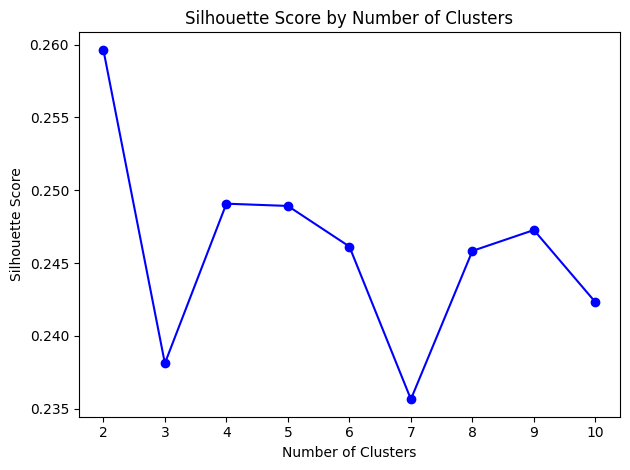

In [19]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_cluster_scaled)
    score = silhouette_score(X_cluster_scaled, labels)
    silhouette_scores.append(score)

plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by Number of Clusters')
plt.tight_layout()
plt.savefig("silhouette_scores.png", dpi=300)
plt.show()


The elbow plot of within-cluster inertia did not reveal a clear point of inflection, indicating no obvious ideal number of clusters. However, a slight flattening of the curve occurred around four clusters, suggesting a potential solution with greater nuance than a simple two-cluster split. Silhouette scores confirmed this pattern. While the highest score was obtained with two clusters, the score for four clusters was the next highest and only marginally lower. Because a two-cluster solution would likely yield only a broad high–low separation, the four-cluster option was selected to provide more informative and interpretable subgroup patterns for K-means clustering.

For n_clusters = 4, average silhouette score is 0.249


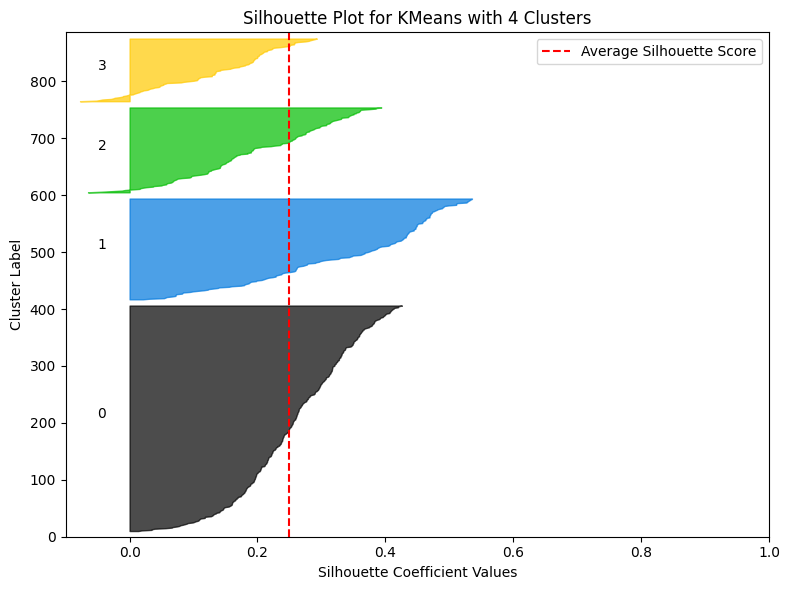

In [20]:
# Generate a silhouette plot for KMeans clustering with k=4 to evaluate cohesion and separation of individual clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_cluster_scaled)

silhouette_avg = silhouette_score(X_cluster_scaled, labels)
sample_silhouette_values = silhouette_samples(X_cluster_scaled, labels)

print(f"For n_clusters = {n_clusters}, average silhouette score is {silhouette_avg:.3f}")

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X_cluster_scaled) + (n_clusters + 1) * 10])

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title(f"Silhouette Plot for KMeans with {n_clusters} Clusters")
ax1.set_xlabel("Silhouette Coefficient Values")
ax1.set_ylabel("Cluster Label")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")
ax1.legend()

plt.tight_layout()
plt.savefig("silhouette_plot_k4.png", dpi=300)
plt.show()


In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_cluster_scaled)

clustered_df = complete_panel.copy().reset_index(drop=True)
clustered_df["Cluster"] = cluster_labels

cluster_summary = clustered_df.groupby("Cluster")[features_for_clustering].mean().reset_index()
cluster_summary

,Cluster,Ozone,PM2.5 - Local Conditions,Nitrogen dioxide (NO2),Asthma Rate,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic Black raw value,% Hispanic raw value,% Non-Hispanic White raw value,Median household income raw value,Children in poverty raw value,Some college raw value
0,0,0.041283,7.930062,11.403438,43.235264,5.284604e+05,0.211829,0.172597,0.055458,0.181435,0.644457,77339.196474,0.137010,0.704589
1,1,0.047578,11.475346,14.404962,47.980899,6.419785e+05,0.272967,0.130266,0.052489,0.550127,0.308618,59597.264045,0.229994,0.518651
2,2,0.040516,8.624972,17.198492,68.414000,6.783565e+05,0.217129,0.147424,0.332347,0.165994,0.418334,60077.393333,0.235287,0.635357
3,3,0.047859,8.945476,19.668658,29.505405,2.532375e+06,0.258691,0.124656,0.028660,0.243213,0.591088,83308.927928,0.111586,0.711485


Cluster 0 includes smaller-population counties (average ~528,460) with moderate asthma rates (43.24). It has the highest percentage of residents aged 65 and older (17.26%) and the highest proportion of Non-Hispanic White residents (64.45%), along with low percentages of Non-Hispanic Black (5.55%) and Hispanic residents (18.14%). Median income is relatively high at $77,339, and 70.46% of adults have some college education, the second-highest among clusters. PM2.5 is lowest (7.93), and NO₂ is on the lower end (11.40), with moderate ozone levels. Characterizing traits: This cluster is defined by moderate asthma levels, low pollution exposure, and an older, predominantly White population with relatively high socioeconomic status.

Cluster 1 features moderately sized counties (average ~641,979) with elevated asthma rates (47.98). It has the highest percentage of children under 18 (27.30%) and the lowest elderly proportion (13.03%). The cluster has the highest proportion of Hispanic residents (55.01%) and the lowest Non-Hispanic White population (30.86%). Median income is lowest at $59,597, with the lowest educational attainment (51.87% with some college). This cluster has the second highest percentage of children living in poverty (23%). It also reports the highest PM2.5 levels (11.48) and elevated NO₂ (14.40), with ozone near the top. Characterizing traits: This cluster is marked by high asthma burden, elevated pollution exposure, and a young, largely Hispanic population with lower income and education.

Cluster 2 consists of medium-population counties (~678,357) and has the highest asthma rate (68.41). It is distinguished by the highest percentage of Non-Hispanic Black residents (33.23%) and the lowest number of Hispanic residents (16.60%). It also has the lowest proportion of children (21.71%) and a moderately-sized elderly population (14.75%). Median income is modest at $60,077, and 63.54% have some college education. Pollution exposure is mixed, with moderate-high NO₂ (17.20), lower ozone (0.0405), and moderate PM2.5 (8.62). Characterizing traits: This cluster is characterized by the highest asthma burden, moderate pollution levels, and a predominantly Black population with relatively high poverty.

Cluster 3 includes the largest counties by population, averaging approximately 2.53 million residents, and has the lowest asthma rates (29.51) among all clusters. The age distribution is balanced, with 25.87% of the population under 18 and 12.47% aged 65 or older. The cluster has the lowest percentage of Non-Hispanic Black residents (2.87%) and the second-highest percentage of Hispanic residents (24.32%). It also reports the highest median household income ($83,309), the highest percentage of adults with some college education (71.15%), and the lowest rate of children living in poverty (11.16%). In terms of pollution, Cluster 3 has the highest NO₂ levels (19.67), the highest ozone levels (0.0479), and moderate PM2.5 levels (8.95). Characterizing traits: This cluster is defined by low asthma burden, high pollution exposure, and favorable socioeconomic conditions, as evidenced by the highest income and education levels and the lowest child poverty rate.


In this clustering analysis, interactions between asthma rate, pollution levels, and demographics revealed important patterns. Counties with lower asthma rates tended to have stronger socioeconomic conditions, larger urban populations, and a higher percentage of non-Hispanic White residents. In contrast, counties with higher asthma rates were more likely to have greater proportions of Black residents, lower median household incomes, and higher rates of poverty, despite having moderate levels of pollution. These results suggest that racial and socioeconomic disparities play a significant role in shaping asthma outcomes, beyond the effects of pollution alone.

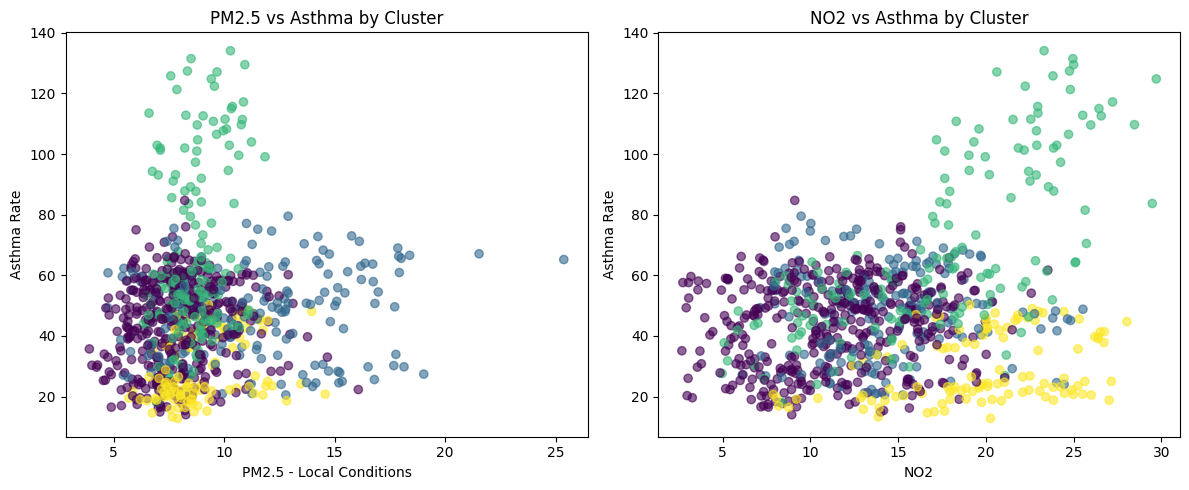

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(clustered_df["PM2.5 - Local Conditions"], clustered_df["Asthma Rate"],
                c=clustered_df["Cluster"], cmap="viridis", alpha=0.6)
axes[0].set_xlabel("PM2.5 - Local Conditions")
axes[0].set_ylabel("Asthma Rate")
axes[0].set_title("PM2.5 vs Asthma by Cluster")

axes[1].scatter(clustered_df["Nitrogen dioxide (NO2)"], clustered_df["Asthma Rate"],
                c=clustered_df["Cluster"], cmap="viridis", alpha=0.6)
axes[1].set_xlabel("NO2")
axes[1].set_ylabel("Asthma Rate")
axes[1].set_title("NO2 vs Asthma by Cluster")

plt.tight_layout()
plt.savefig("cluster_scatterplots.png", dpi=300)
plt.show()



These scatterplots show how asthma emergency visit rates vary with pollutant levels, separated by the four clusters. The left figure indicates that asthma rates do not rise consistently with PM2.5, but clusters capture groups of counties with distinct combinations of exposure and outcomes. The right figure shows a clearer upward trend for NO₂, where higher levels are more often associated with higher asthma rates, and clusters highlight how this relationship differs across counties.

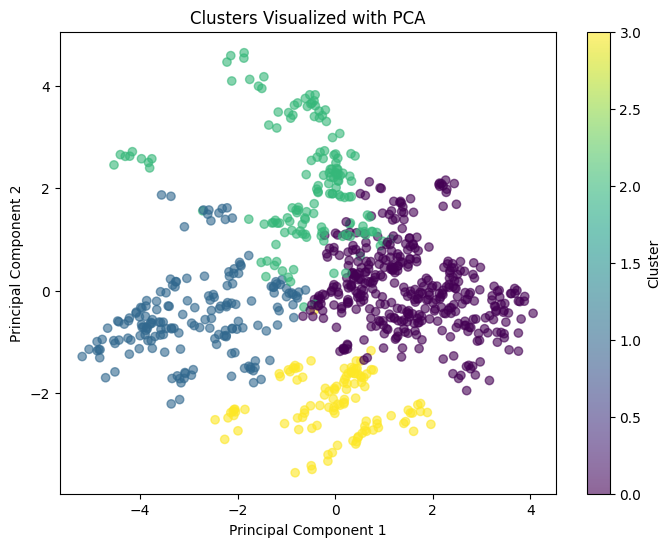

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Fit KMeans on the scaled clustering data
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_cluster_scaled)

# Perform PCA on the same scaled data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

# Plot the PCA-reduced data with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clusters Visualized with PCA")
plt.colorbar(label="Cluster")
plt.savefig("pca_clusters.png", dpi=300)
plt.show()



PCA was used to reduce the full set of asthma, pollution, and demographic variables into two principal components that capture a substantial portion of the variation in the data. This made it possible to create a two-dimensional plot that reflects the combined influence of many original features in a reduced space. The scatterplot shows how the four clusters identified through k-means separate in this compressed feature space. While there is some overlap, the clusters generally form distinct regions that suggest differences in the underlying data. PCA is useful for identifying global trends and is computationally efficient, but it assumes that relationships between variables are linear and may blend clusters that are actually distinct in a nonlinear space. As a result, although the plot provides a clean and interpretable view, it may obscure more complex local structures or hidden subgroups.

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


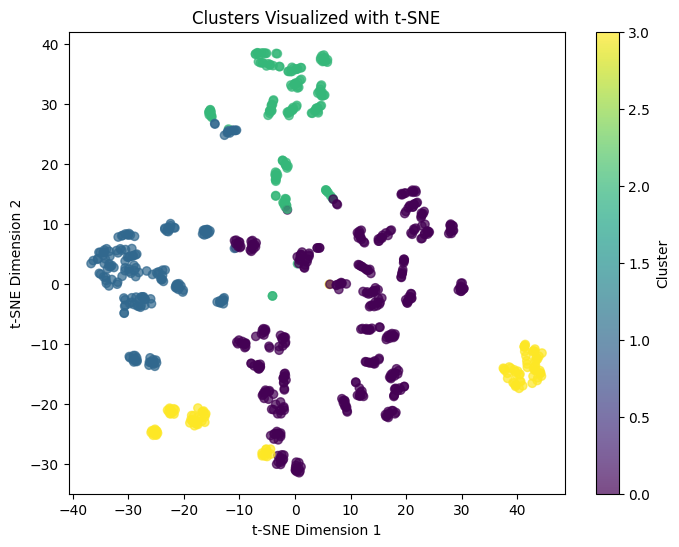

In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_cluster_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap="viridis", alpha=0.7)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("Clusters Visualized with t-SNE")
plt.colorbar(label="Cluster")
plt.savefig("tsne_clusters.png", dpi=300)
plt.show()


The t-SNE plot is based on t-distributed Stochastic Neighbor Embedding, a nonlinear dimensionality reduction method that preserves local structure and emphasizes similarities between nearby data points. In this visualization, the four clusters appear more distinctly separated. The yellow cluster (Cluster 3) is split into two apparent subgroups, potentially revealing hidden structure not captured by PCA. t-SNE is especially effective when clusters are nonlinearly separated; however, it can distort the global relationships between clusters, is sensitive to parameter choices, and can vary slightly between runs. Despite those limitations, the clearer boundaries and subgroupings suggest that t-SNE may better reflect the true underlying structure in this case.

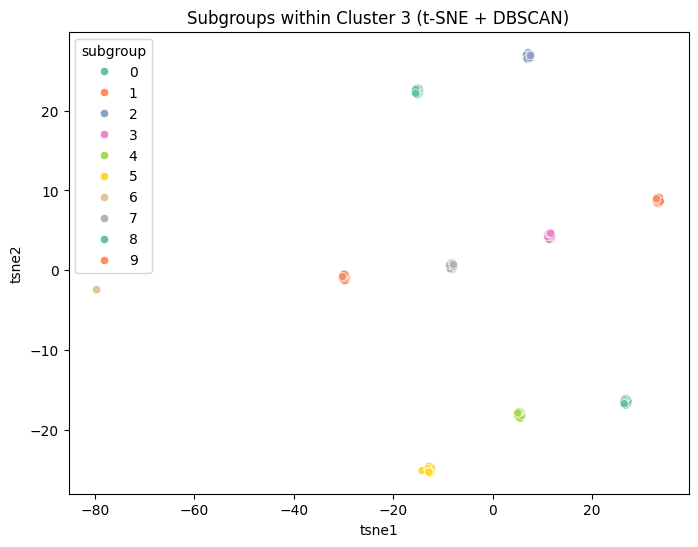

              Year  Asthma Rate  Nitrogen dioxide (NO2)       Ozone  \
count   111.000000   111.000000              111.000000  111.000000   
mean   2015.954955    29.505405               19.668658    0.047859   
std       3.197691    11.017885                4.621158    0.005728   
min    2011.000000    12.800000                7.876633    0.036699   
25%    2013.000000    20.600000               17.299564    0.044044   
50%    2016.000000    24.300000               20.022731    0.047360   
75%    2019.000000    39.950000               22.987985    0.052178   
max    2021.000000    50.300000               28.043541    0.060256   

       PM2.5 - Local Conditions  Population raw value  \
count                111.000000          1.110000e+02   
mean                   8.945476          2.532375e+06   
std                    1.759104          2.883100e+06   
min                    5.686245          1.282890e+05   
25%                    7.768426          3.554810e+05   
50%               

In [25]:
from sklearn.cluster import DBSCAN
import seaborn as sns

cluster3_df = clustered_df[clustered_df['Cluster'] == 3].copy()
numeric_data = cluster3_df[features_for_clustering]  # only numeric features used in clustering
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
tsne_results = tsne.fit_transform(numeric_data)
tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
db = DBSCAN(eps=3, min_samples=5).fit(tsne_df)
tsne_df['subgroup'] = db.labels_
cluster3_df = cluster3_df.reset_index(drop=True)
cluster3_df['tsne1'] = tsne_df['tsne1']
cluster3_df['tsne2'] = tsne_df['tsne2']
cluster3_df['subgroup'] = tsne_df['subgroup']
summary_stats = cluster3_df.describe()
group_means = cluster3_df.groupby('subgroup').mean(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cluster3_df, x='tsne1', y='tsne2', hue='subgroup', palette='Set2')
plt.title("Subgroups within Cluster 3 (t-SNE + DBSCAN)")
plt.savefig("cluster3_tsne_dbscan.png", dpi=300, bbox_inches="tight")

plt.show()
print(summary_stats)
print(group_means)



In [26]:
print(merged_df.columns.tolist())

['StateFIPS', 'State', 'CountyFIPS', 'County', 'Year', 'Asthma Rate', 'FIPS', 'Nitrogen dioxide (NO2)', 'Ozone', 'PM2.5 - Local Conditions', 'Population raw value', '% below 18 years of age raw value', '% 65 and older raw value', '% Non-Hispanic Black raw value', '% Hispanic raw value', '% Non-Hispanic White raw value', 'Median household income raw value', 'Children in poverty raw value', 'Some college raw value']


To better understand the surprising composition of Cluster 3, which had the highest population but the lowest asthma rates, we applied t-SNE followed by DBSCAN to examine potential subgroups within this cluster. This analysis revealed that Cluster 3 was not a uniform group but instead contained two clearly distinct subgroups. One subgroup included small, affluent, low-density counties with consistently low asthma rates. The other subgroup consisted of large, high-density urban counties with higher asthma rates, greater pollution exposure, and more socioeconomic disadvantage. This explains the split observed in the t-SNE visualization. DBSCAN is a density-based clustering algorithm that groups closely packed points and labels points in sparse regions as noise, making it effective for identifying non-spherical, non-linear structures. The original K-means clustering did not identify this division, likely because it is based on global Euclidean distances and assumes spherical clusters in the full feature space. This makes K-means less effective at detecting localized, non-linear patterns that t-SNE and DBSCAN are better able to reveal.

## Weighted Least Squares Regression

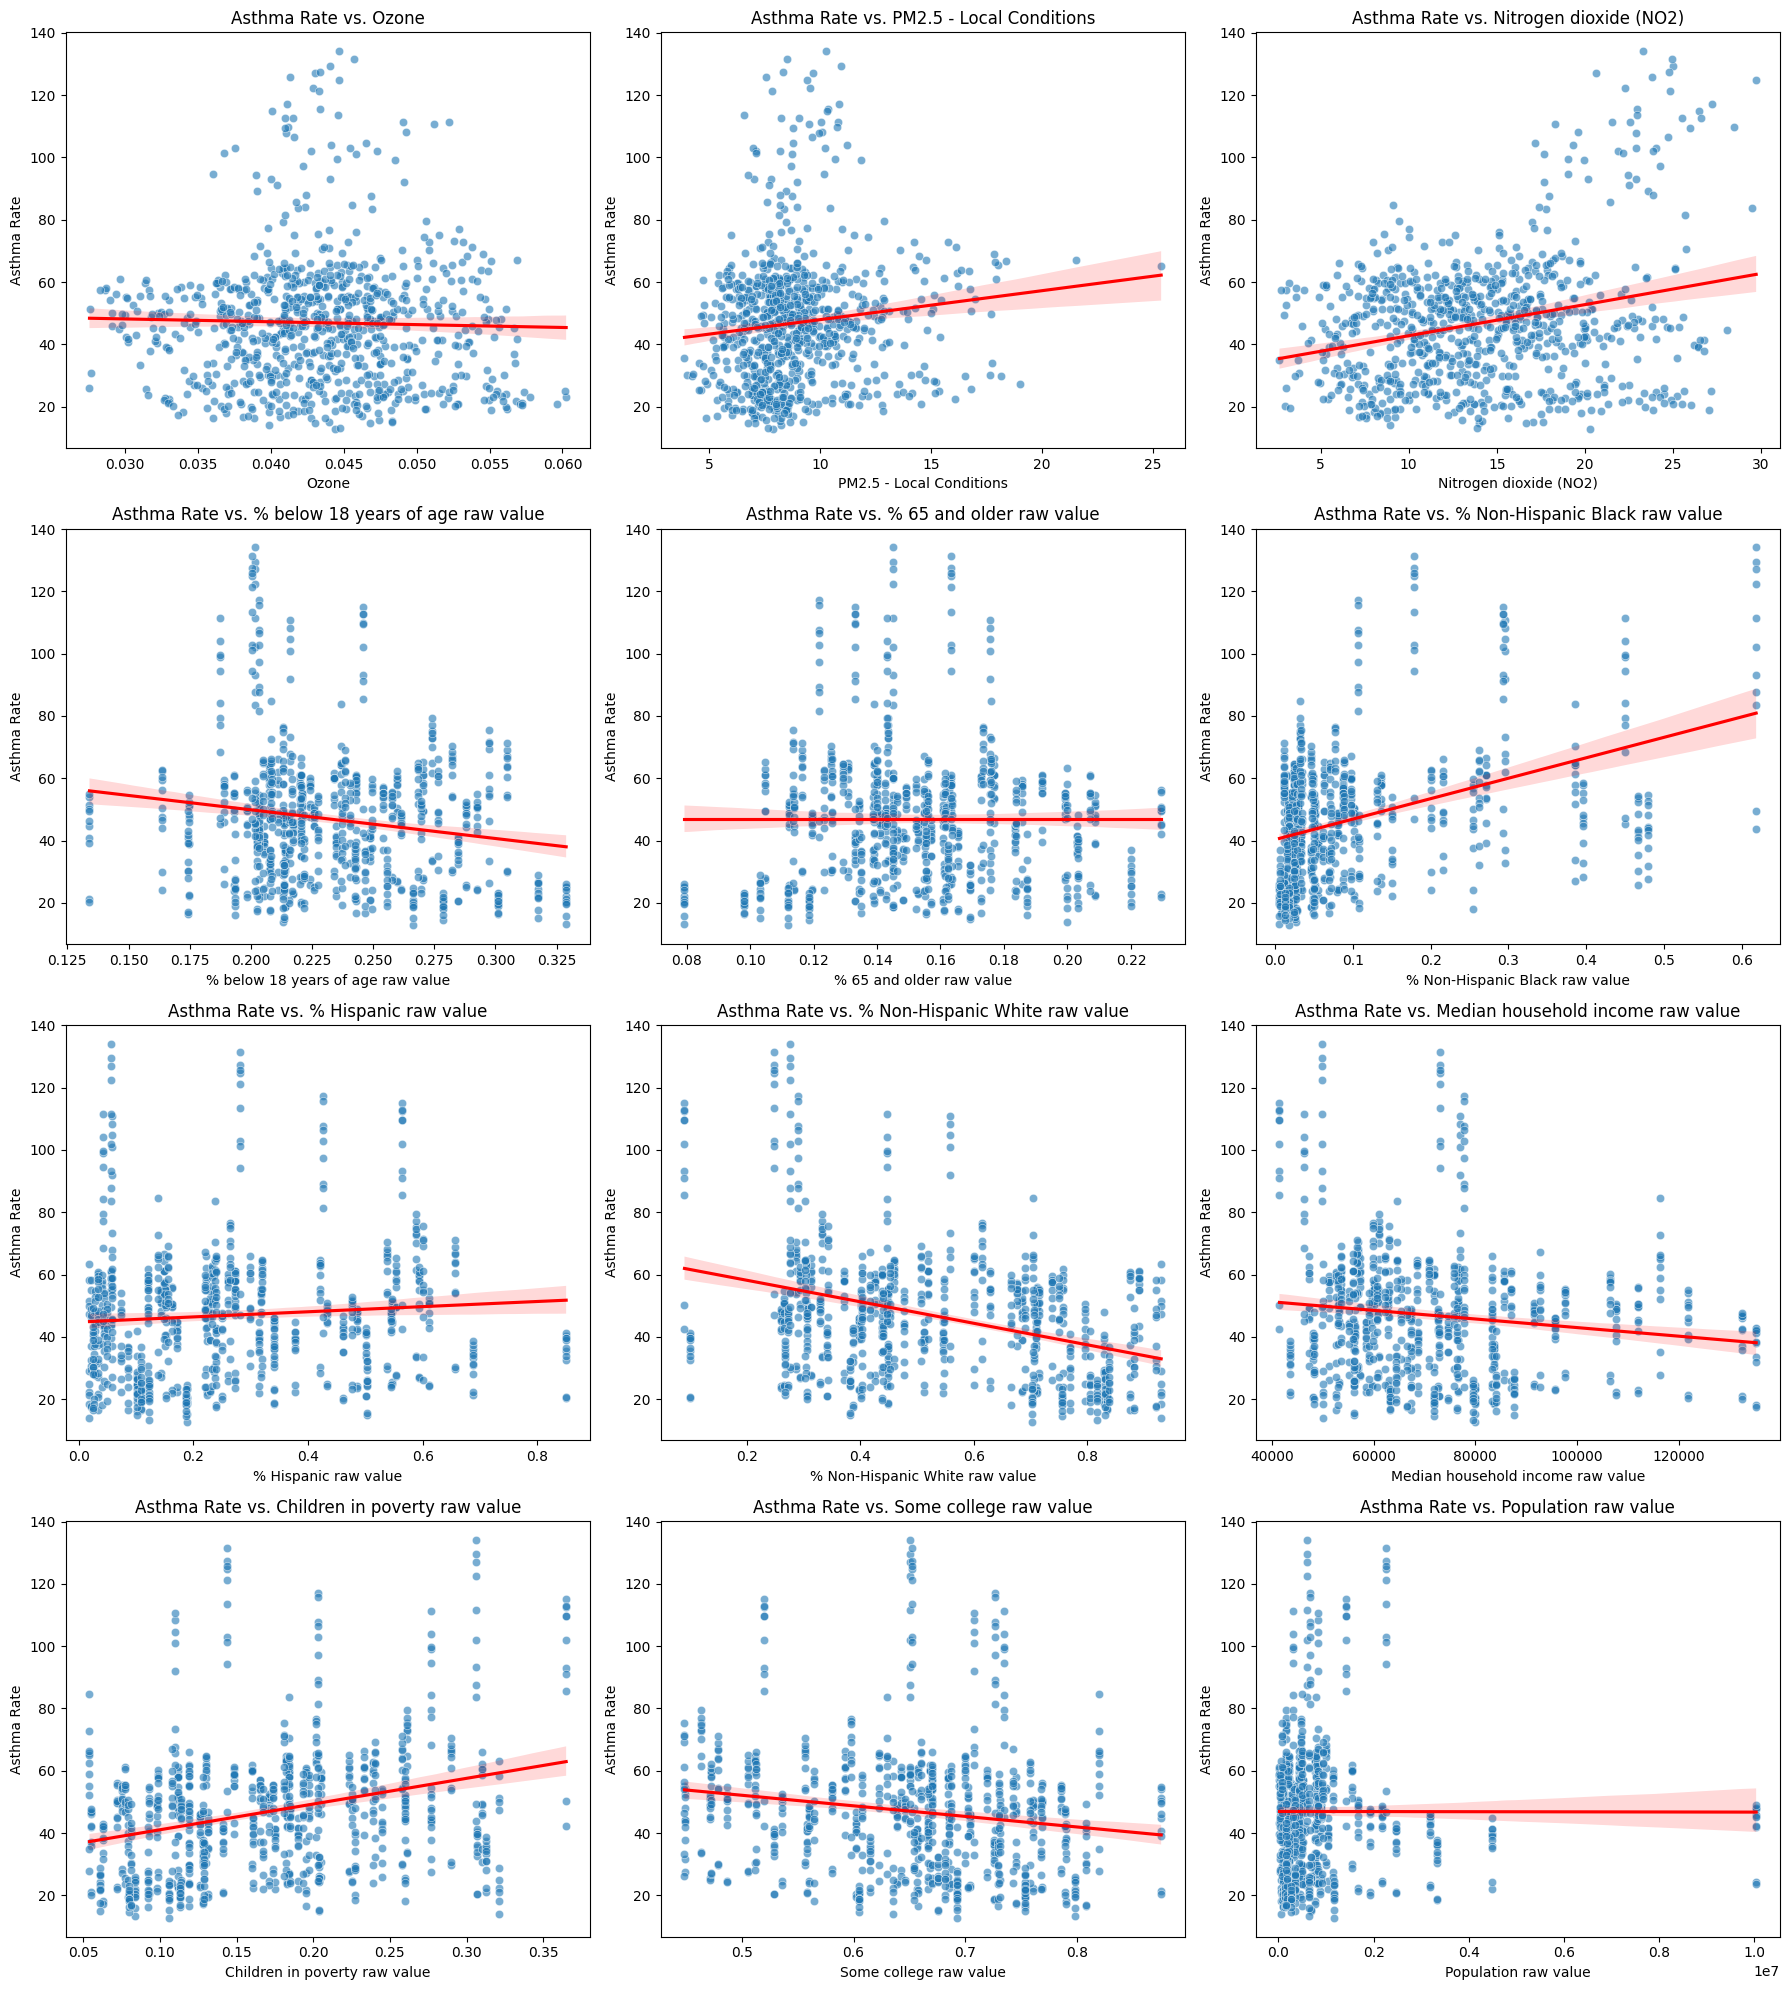

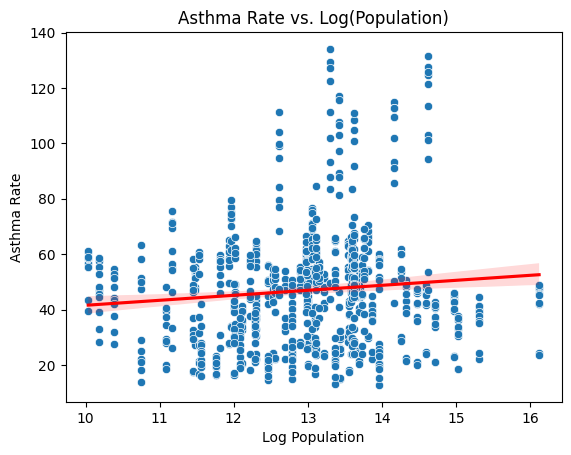

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

complete_panel["Log Population"] = np.log(complete_panel["Population raw value"])

features_to_plot = [
    "Ozone",
    "PM2.5 - Local Conditions",
    "Nitrogen dioxide (NO2)",
    "% below 18 years of age raw value",
    "% 65 and older raw value",
    "% Non-Hispanic Black raw value",
    "% Hispanic raw value",
    "% Non-Hispanic White raw value",
    "Median household income raw value",
    "Children in poverty raw value",
    "Some college raw value",
    "Population raw value"
]

n_cols = 3
n_rows = int((len(features_to_plot) + n_cols - 1) / n_cols)
plt.figure(figsize=(18, 5 * n_rows))

for i, feature in enumerate(features_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(data=complete_panel, x=feature, y="Asthma Rate", alpha=0.6)
    sns.regplot(data=complete_panel, x=feature, y="Asthma Rate", scatter=False, color='red')
    plt.title(f"Asthma Rate vs. {feature}")
    plt.tight_layout()

plt.show()

sns.scatterplot(data=complete_panel, x="Log Population", y="Asthma Rate")
sns.regplot(data=complete_panel, x="Log Population", y="Asthma Rate", scatter=False, color='red')
plt.title("Asthma Rate vs. Log(Population)")
plt.show()


Scatterplots were created to compare asthma rate with each pollution and demographic variable in the dataset, with regression lines and 95% confidence intervals added to visualize potential relationships. Very weak positive trends were observed for ozone and PM2.5, while NO₂ showed a slightly clearer but still weak positive association. A weak positive trend was seen for the percentage below 18 years of age, and the percentage 65 and older appeared essentially flat. A moderate positive relationship with asthma rate was observed for the percentage of Non-Hispanic Black residents, whereas negative trends were seen for the percentages of Hispanic and Non-Hispanic White residents, with the latter being somewhat stronger. Median household income was negatively associated with asthma, while children in poverty showed a moderate positive relationship, and higher levels of college education displayed a weak to moderate negative trend. No clear linear association was observed for population size, whether raw or logged. Overall, the scatterplots indicated that most predictors had only weak or modest linear relationships with asthma rate, with a few demographic factors showing stronger patterns.

In [28]:
features_to_scale = [
    "Ozone",
    "PM2.5 - Local Conditions",
    "Nitrogen dioxide (NO2)",
    "% below 18 years of age raw value",
    "% 65 and older raw value",
    "% Non-Hispanic Black raw value",
    "% Hispanic raw value",
    "% Non-Hispanic White raw value",
    "Median household income raw value",
    "Children in poverty raw value",
    "Some college raw value"
]

non_scaled_columns = ["Asthma Rate", "Population raw value"]

X = complete_panel[features_to_scale + non_scaled_columns].dropna().reset_index(drop=True)

scaler = StandardScaler()
X_scaled_part = scaler.fit_transform(X[features_to_scale])
X_scaled_df = pd.DataFrame(X_scaled_part, columns=features_to_scale)

final_df = pd.concat([X_scaled_df, X[non_scaled_columns].reset_index(drop=True)], axis=1)


In [29]:
import statsmodels.api as sm
import numpy as np

X_model = sm.add_constant(final_df[features_to_scale])
y = final_df["Asthma Rate"]
weights = np.log(final_df["Population raw value"] + 1)

wls_model = sm.WLS(y, X_model, weights=weights)
wls_results = wls_model.fit()

print(wls_results.summary())



                            WLS Regression Results                            
Dep. Variable:            Asthma Rate   R-squared:                       0.316
Model:                            WLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     34.67
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           5.72e-61
Time:                        03:26:41   Log-Likelihood:                -3574.6
No. Observations:                 836   AIC:                             7173.
Df Residuals:                     824   BIC:                             7230.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Regression was conducted using weighted least squares after preparing the dataset to include scaled pollutant and demographic predictors, the unscaled asthma rate as the dependent variable, and population size as a weighting factor. Pollutant and demographic variables were standardized with a z-score transformation, while asthma rate and population were retained in their original units. The regression model was specified with asthma rate as the outcome and the selected predictors entered as independent variables. To incorporate county size, weights equal to the natural logarithm of population plus one were applied, which allowed larger counties to influence the estimates more than smaller counties while reducing the skew from extremely large counties and avoiding undefined log values. Year was not included as a predictor, as it served only to structure the panel and was needed to preserve sufficient county–year observations. The model was then fit and results were produced, providing coefficients, significance levels, and model diagnostics.

The weighted least squares (WLS) model explains about 31.6% of the variation in asthma rates (R² = 0.316, adjusted R² = 0.307). While this indicates a modest fit, it suggests that asthma prevalence is influenced by additional factors not captured in the dataset. The F-statistic (34.67, p < 0.001) shows that the model overall is statistically significant. Diagnostics also reveal skewness and kurtosis, suggesting departures from normality that may reflect heterogeneity across counties.

Variable-Specific Results

Ozone: Positive coefficient (1.70) but only marginally significant (p = 0.052). This implies a weak positive association with asthma rates that is not statistically robust.

PM2.5 - Local Conditions: Very small positive coefficient (0.40) and nonsignificant (p = 0.589), suggesting no meaningful relationship.

Nitrogen dioxide (NO₂): Strong positive and significant association (coef = 3.73, p < 0.001). Higher NO₂ levels are reliably linked to higher asthma rates, consistent with prior environmental health literature.

% below 18 years of age: Negative and significant (coef = –3.73, p = 0.001). Areas with higher proportions of children surprisingly show lower asthma rates, which may indicate confounding or misalignment between reported prevalence and population substructure.

% 65 and older: Positive and significant (coef = 2.86, p = 0.003). Counties with larger elderly populations tend to report higher asthma rates.

% Non-Hispanic Black: Positive but nonsignificant (coef = 2.21, p = 0.188). Suggests a potential trend but not statistically supported in this model.

% Hispanic: Negative and significant (coef = –7.23, p = 0.007). Counties with higher Hispanic populations are associated with lower asthma rates, which could reflect reporting or healthcare access differences.

% Non-Hispanic White: Strong negative and significant (coef = –10.54, p < 0.001). This indicates that higher proportions of White residents are strongly linked with lower asthma prevalence.

Median household income: Negative but nonsignificant (coef = –1.85, p = 0.211). Higher income is weakly associated with lower asthma rates, but the effect is not statistically reliable.

Children in poverty: Positive but nonsignificant (coef = 0.23, p = 0.870). Suggests little evidence of an independent effect once other factors are controlled.

Some college: Negative and significant (coef = –3.52, p = 0.006). Counties with higher education levels tend to show lower asthma rates.

The model highlights NO₂ as the strongest environmental predictor of asthma rates, while demographic variables such as % elderly, % Hispanic, % Non-Hispanic White, and education also emerge as significant. However, the modest R² and presence of counterintuitive signs (e.g., lower rates in counties with more children) suggest both multicollinearity among predictors and the likelihood that other unmeasured factors drive asthma prevalence.

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = final_df.drop(columns=["Asthma Rate", "Population raw value"])
X_vif = sm.add_constant(X_vif)

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_data


,feature,VIF
0,const,1.000000
1,Ozone,2.073883
2,PM2.5 - Local Conditions,1.500402
3,Nitrogen dioxide (NO2),1.686558
4,% below 18 years of age raw value,3.534255
5,% 65 and older raw value,2.479716
6,% Non-Hispanic Black raw value,7.539941
7,% Hispanic raw value,17.866921
8,% Non-Hispanic White raw value,15.308943
9,Median household income raw value,5.892087


Variance inflation factors (VIFs) were then calculated to assess multicollinearity among predictors. Low VIF values under 2 were observed for environmental variables, while moderate to high collinearity was found among demographic and socioeconomic predictors. In particular, percent Hispanic and percent non-Hispanic White exhibited severe multicollinearity, indicating overlapping information with other demographic variables and raising concerns about coefficient stability and interpretability.


In [31]:
# with year
features_to_scale_wy = [
    "Ozone",
    "PM2.5 - Local Conditions",
    "Nitrogen dioxide (NO2)",
    "% below 18 years of age raw value",
    "% 65 and older raw value",
    "% Non-Hispanic Black raw value",
    "% Hispanic raw value",
    "% Non-Hispanic White raw value",
    "Median household income raw value",
    "Children in poverty raw value",
    "Some college raw value"
]

non_scaled_columns_wy = ["Asthma Rate", "Population raw value", "Year"]

X_wy = complete_panel[features_to_scale_wy + non_scaled_columns_wy].dropna().reset_index(drop=True)

scaler = StandardScaler()
X_scaled_part_wy = scaler.fit_transform(X_wy[features_to_scale_wy])
X_scaled_df_wy = pd.DataFrame(X_scaled_part_wy, columns=features_to_scale_wy)

final_df_wy = pd.concat([X_scaled_df_wy, X_wy[non_scaled_columns_wy].reset_index(drop=True)], axis=1)


In [32]:

X_model_wy = sm.add_constant(final_df_wy[features_to_scale_wy + ["Year"]])
y_wy = final_df_wy["Asthma Rate"]
weights_wy = np.log(final_df_wy["Population raw value"] + 1)

wls_model_wy = sm.WLS(y_wy, X_model_wy, weights=weights_wy)
wls_results_wy = wls_model_wy.fit()

print(wls_results_wy.summary())


                            WLS Regression Results                            
Dep. Variable:            Asthma Rate   R-squared:                       0.492
Model:                            WLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     66.50
Date:                Tue, 07 Oct 2025   Prob (F-statistic):          2.15e-112
Time:                        03:26:41   Log-Likelihood:                -3450.3
No. Observations:                 836   AIC:                             6927.
Df Residuals:                     823   BIC:                             6988.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [33]:
X_vif_wy = final_df_wy.drop(columns=["Asthma Rate", "Population raw value"])
X_vif_wy = sm.add_constant(X_vif_wy)

vif_data_wy = pd.DataFrame()
vif_data_wy["feature"] = X_vif_wy.columns
vif_data_wy["VIF"] = [variance_inflation_factor(X_vif_wy.values, i) for i in range(X_vif_wy.shape[1])]
vif_data_wy

,feature,VIF
0,const,457294.897105
1,Ozone,2.102962
2,PM2.5 - Local Conditions,1.504241
3,Nitrogen dioxide (NO2),1.793411
4,% below 18 years of age raw value,3.551730
5,% 65 and older raw value,2.487549
6,% Non-Hispanic Black raw value,7.544884
7,% Hispanic raw value,17.879683
8,% Non-Hispanic White raw value,15.317759
9,Median household income raw value,5.899669


When Year was included in the model, the variance inflation factor (VIF) results indicated moderate to high multicollinearity among several demographic predictors, particularly % Hispanic (VIF ≈ 17.9) and % Non-Hispanic White (VIF ≈ 15.3). Other variables such as % Black, median household income, and children in poverty also showed elevated VIF values above 5, suggesting some shared variance across socioeconomic and demographic measures. Pollution variables (ozone, PM₂.₅, NO₂) and Year itself exhibited low VIF values near 2 or below, indicating little concern for collinearity in those predictors. Overall, multicollinearity is concentrated among racial/ethnic composition and socioeconomic variables, while Year did not introduce instability.

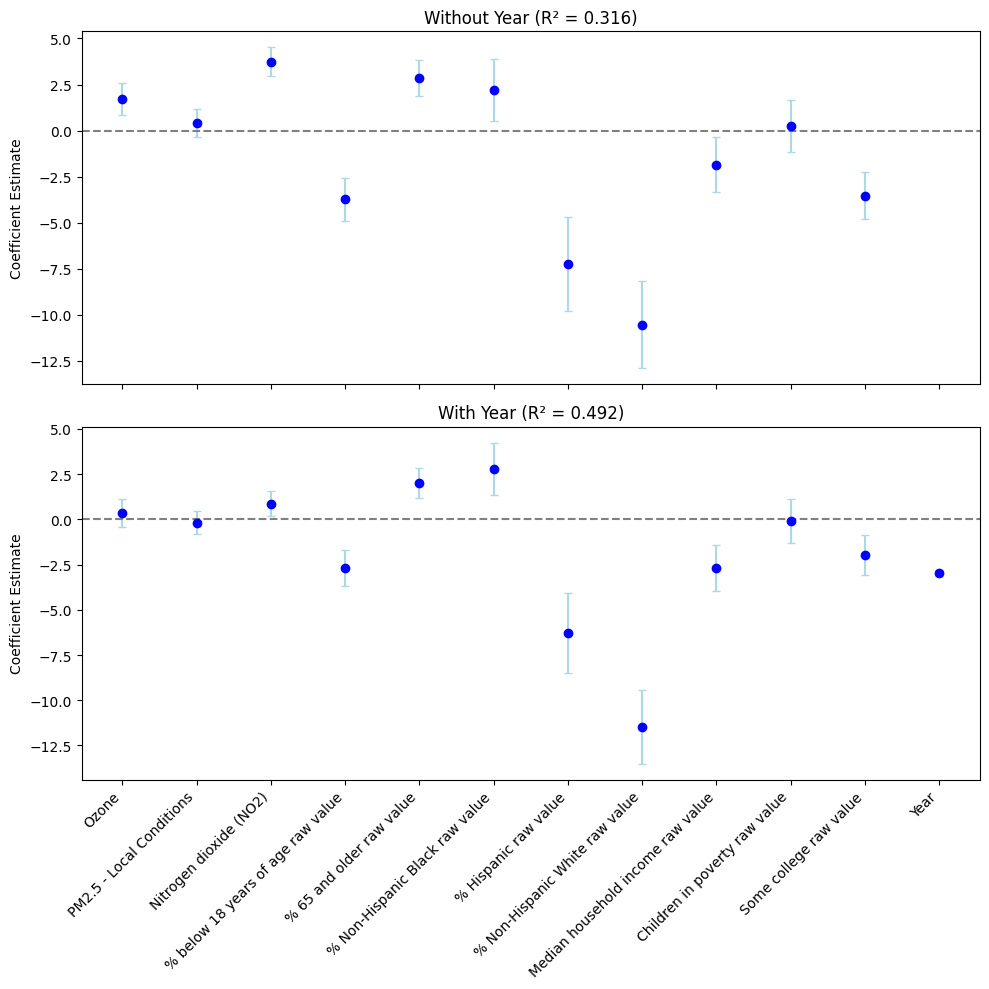

In [34]:

results_dict = {
    "Without Year": wls_results,
    "With Year": wls_results_wy
}

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)

for ax, (title, results) in zip(axes, results_dict.items()):
    coefs = results.params.drop("const")
    errors = results.bse.drop("const")
    features = coefs.index

    ax.errorbar(
        range(len(features)),
        coefs,
        yerr=errors,
        fmt='o',
        color='blue',
        ecolor='lightblue',
        capsize=3
    )
    ax.axhline(0, color='gray', linestyle='--')
    ax.set_title(f"{title} (R² = {results.rsquared:.3f})")
    ax.set_ylabel("Coefficient Estimate")
    ax.set_xticks(range(len(features)))
    ax.set_xticklabels(features, rotation=45, ha="right")

plt.tight_layout()
plt.savefig("wls_comparison.png", dpi=300, bbox_inches="tight")

plt.show()


Two weighted least squares (WLS) regression models were estimated to compare predictors of county-level asthma rates with and without the inclusion of Year as a covariate. The model without Year achieved a modest fit (R² = 0.316), with pollutant exposures such as NO₂ and demographic composition (% Black, % Hispanic, % White) showing the strongest associations. When Year was included, the explanatory power improved substantially (R² = 0.492), reflecting the influence of the strong temporal trend in asthma outcomes. Coefficients for demographic and pollutant predictors remained generally consistent in direction, although their magnitudes were reduced as part of the temporal variance was absorbed by Year. Together, these models illustrate both the importance of accounting for time trends to improve predictive accuracy and the persistent role of environmental and social factors in shaping asthma rates independent of year-to-year variation.

## Random Forest

In [35]:
# 200 trees to start

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

predictors_with_year = [
    "Year",
    "Ozone",
    "PM2.5 - Local Conditions",
    "Nitrogen dioxide (NO2)",
    "% below 18 years of age raw value",
    "% 65 and older raw value",
    "% Non-Hispanic Black raw value",
    "% Hispanic raw value",
    "% Non-Hispanic White raw value",
    "Median household income raw value",
    "Children in poverty raw value",
    "Some college raw value",
    "Population raw value"
]

predictors_without_year = [p for p in predictors_with_year if p != "Year"]

target_rf = "Asthma Rate"

X_with_year = complete_panel[predictors_with_year]
X_without_year = complete_panel[predictors_without_year]
y_rf = complete_panel[target_rf]

X_train_wy, X_test_wy, y_train_wy, y_test_wy = train_test_split(X_with_year, y_rf, test_size=0.2, random_state=42)
X_train_ny, X_test_ny, y_train_ny, y_test_ny = train_test_split(X_without_year, y_rf, test_size=0.2, random_state=42)

rf200_with_year = RandomForestRegressor(n_estimators=200, random_state=42)
rf200_without_year = RandomForestRegressor(n_estimators=200, random_state=42)

rf200_with_year.fit(X_train_wy, y_train_wy)
rf200_without_year.fit(X_train_ny, y_train_ny)

y200_pred_train_wy = rf200_with_year.predict(X_train_wy)
y200_pred_test_wy = rf200_with_year.predict(X_test_wy)
y200_pred_train_ny = rf200_without_year.predict(X_train_ny)
y200_pred_test_ny = rf200_without_year.predict(X_test_ny)

print("=== 200 Trees: With Year Included ===")
print(f"Train R²: {r2_score(y_train_wy, y200_pred_train_wy):.3f}, Train RMSE: {np.sqrt(mean_squared_error(y_train_wy, y200_pred_train_wy)):.2f}")
print(f"Test R²: {r2_score(y_test_wy, y200_pred_test_wy):.3f}, Test RMSE: {np.sqrt(mean_squared_error(y_test_wy, y200_pred_test_wy)):.2f}")
importances200_wy = pd.DataFrame({"Feature": predictors_with_year, "Importance": rf200_with_year.feature_importances_}).sort_values(by="Importance", ascending=False)
print(importances200_wy)

print("\n=== 200 Trees: Without Year ===")
print(f"Train R²: {r2_score(y_train_ny, y200_pred_train_ny):.3f}, Train RMSE: {np.sqrt(mean_squared_error(y_train_ny, y200_pred_train_ny)):.2f}")
print(f"Test R²: {r2_score(y_test_ny, y200_pred_test_ny):.3f}, Test RMSE: {np.sqrt(mean_squared_error(y_test_ny, y200_pred_test_ny)):.2f}")
importances200_ny = pd.DataFrame({"Feature": predictors_without_year, "Importance": rf200_without_year.feature_importances_}).sort_values(by="Importance", ascending=False)
print(importances200_ny)



=== 200 Trees: With Year Included ===
Train R²: 0.992, Train RMSE: 1.78
Test R²: 0.946, Test RMSE: 5.15
                              Feature  Importance
0                                Year    0.264770
8      % Non-Hispanic White raw value    0.202833
6      % Non-Hispanic Black raw value    0.168572
3              Nitrogen dioxide (NO2)    0.090748
4   % below 18 years of age raw value    0.047275
12               Population raw value    0.039416
9   Median household income raw value    0.038577
1                               Ozone    0.031214
5            % 65 and older raw value    0.029820
7                % Hispanic raw value    0.023892
10      Children in poverty raw value    0.023454
11             Some college raw value    0.023216
2            PM2.5 - Local Conditions    0.016214

=== 200 Trees: Without Year ===
Train R²: 0.968, Train RMSE: 3.66
Test R²: 0.777, Test RMSE: 10.52
                              Feature  Importance
2              Nitrogen dioxide (NO2)    0.262

In [36]:
# 100 trees

predictors_with_year = [
    "Year",
    "Ozone",
    "PM2.5 - Local Conditions",
    "Nitrogen dioxide (NO2)",
    "% below 18 years of age raw value",
    "% 65 and older raw value",
    "% Non-Hispanic Black raw value",
    "% Hispanic raw value",
    "% Non-Hispanic White raw value",
    "Median household income raw value",
    "Children in poverty raw value",
    "Some college raw value",
    "Population raw value"
]

predictors_without_year = [p for p in predictors_with_year if p != "Year"]

target_rf = "Asthma Rate"

X_with_year = complete_panel[predictors_with_year]
X_without_year = complete_panel[predictors_without_year]
y_rf = complete_panel[target_rf]

X_train_wy, X_test_wy, y_train_wy, y_test_wy = train_test_split(X_with_year, y_rf, test_size=0.2, random_state=42)
X_train_ny, X_test_ny, y_train_ny, y_test_ny = train_test_split(X_without_year, y_rf, test_size=0.2, random_state=42)

rf_with_year = RandomForestRegressor(n_estimators=100, random_state=42)
rf_without_year = RandomForestRegressor(n_estimators=100, random_state=42)

rf_with_year.fit(X_train_wy, y_train_wy)
rf_without_year.fit(X_train_ny, y_train_ny)

y_pred_train_wy = rf_with_year.predict(X_train_wy)
y_pred_test_wy = rf_with_year.predict(X_test_wy)
y_pred_train_ny = rf_without_year.predict(X_train_ny)
y_pred_test_ny = rf_without_year.predict(X_test_ny)

print("=== With Year Included ===")
print(f"Train R²: {r2_score(y_train_wy, y_pred_train_wy):.3f}, Train RMSE: {np.sqrt(mean_squared_error(y_train_wy, y_pred_train_wy)):.2f}")
print(f"Test R²: {r2_score(y_test_wy, y_pred_test_wy):.3f}, Test RMSE: {np.sqrt(mean_squared_error(y_test_wy, y_pred_test_wy)):.2f}")
importances_wy = pd.DataFrame({"Feature": predictors_with_year, "Importance": rf_with_year.feature_importances_}).sort_values(by="Importance", ascending=False)
print(importances_wy)

print("\n=== Without Year ===")
print(f"Train R²: {r2_score(y_train_ny, y_pred_train_ny):.3f}, Train RMSE: {np.sqrt(mean_squared_error(y_train_ny, y_pred_train_ny)):.2f}")
print(f"Test R²: {r2_score(y_test_ny, y_pred_test_ny):.3f}, Test RMSE: {np.sqrt(mean_squared_error(y_test_ny, y_pred_test_ny)):.2f}")
importances_ny = pd.DataFrame({"Feature": predictors_without_year, "Importance": rf_without_year.feature_importances_}).sort_values(by="Importance", ascending=False)
print(importances_ny)


=== With Year Included ===
Train R²: 0.992, Train RMSE: 1.84
Test R²: 0.947, Test RMSE: 5.11
                              Feature  Importance
0                                Year    0.265650
8      % Non-Hispanic White raw value    0.208919
6      % Non-Hispanic Black raw value    0.162304
3              Nitrogen dioxide (NO2)    0.087260
4   % below 18 years of age raw value    0.050693
12               Population raw value    0.041246
9   Median household income raw value    0.036274
1                               Ozone    0.034217
5            % 65 and older raw value    0.027455
11             Some college raw value    0.023946
10      Children in poverty raw value    0.023871
7                % Hispanic raw value    0.023017
2            PM2.5 - Local Conditions    0.015149

=== Without Year ===
Train R²: 0.967, Train RMSE: 3.72
Test R²: 0.784, Test RMSE: 10.35
                              Feature  Importance
2              Nitrogen dioxide (NO2)    0.262367
5      % Non-Hispa

A random forest regression model was implemented to evaluate the factors most predictive of county-level asthma rates. The model was trained using an 80/20 train–test split and constructed with ensembles of decision trees to capture nonlinear relationships and interactions across predictors. Two model specifications were considered: one including Year as a predictor and one excluding it. Including Year allowed the model to account for the strong downward temporal trend in asthma outcomes observed across time, while excluding Year highlighted the contributions of pollution and demographic factors independent of time. Predictors included air pollutants (NO₂, PM₂.5, and ozone), demographics (age structure, race/ethnicity, poverty, and education), income, and population size. Variable importance measures were extracted to identify the relative contribution of each predictor to the model’s explanatory power.

When trained with 200 trees, the model including Year achieved excellent fit to the training data (R² = 0.992, RMSE = 1.78) and maintained very strong performance on the test set (R² = 0.946, RMSE = 5.15). This indicates close alignment between training and test results, suggesting no substantial overfitting. Importantly, the test RMSE of 5.15 was well within one standard deviation of the observed asthma rates, confirming that prediction errors were small relative to the variability in the outcome. In contrast, the model excluding Year achieved lower training performance (R² = 0.968, RMSE = 3.66) and considerably weaker test performance (R² = 0.777, RMSE = 10.52), though this error also remained within one standard deviation. Across specifications, Year was consistently the strongest predictor when included, reflecting the dominant temporal trend. When Year was excluded, demographic factors (% Black, % White) and NO₂ concentrations emerged as leading predictors, consistent with regression findings. These results demonstrate that while temporal structure explains much of the variation, demographic and environmental disparities remain highly influential drivers of asthma outcomes when time is not explicitly modeled.

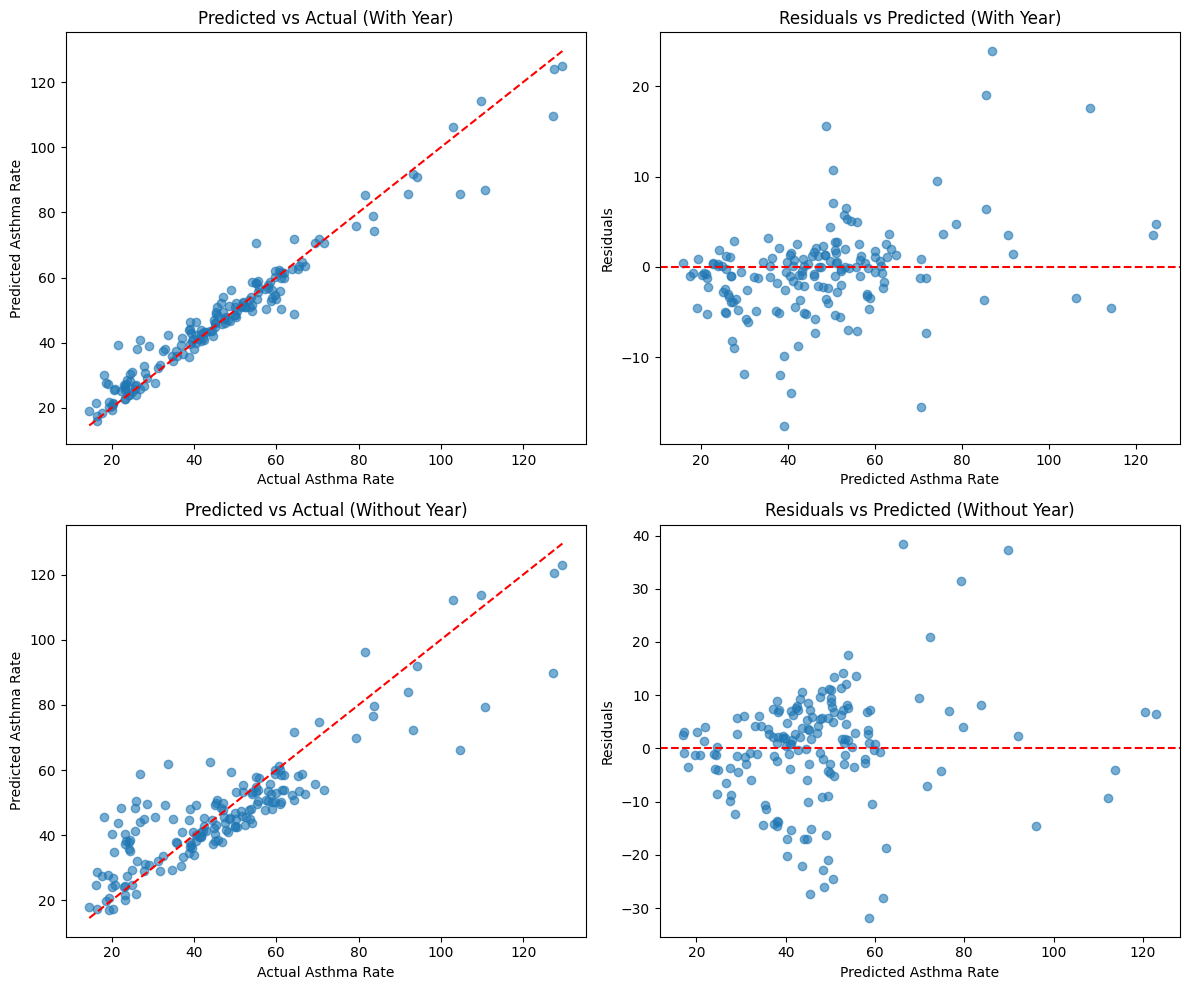

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

y200_pred_test_wy = rf200_with_year.predict(X_test_wy)
residuals200_wy = y_test_wy - y200_pred_test_wy

y200_pred_test_ny = rf200_without_year.predict(X_test_ny)
residuals200_ny = y_test_ny - y200_pred_test_ny

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.scatter(y_test_wy, y200_pred_test_wy, alpha=0.6)
plt.plot([y_test_wy.min(), y_test_wy.max()], [y_test_wy.min(), y_test_wy.max()], 'r--')
plt.xlabel("Actual Asthma Rate")
plt.ylabel("Predicted Asthma Rate")
plt.title("Predicted vs Actual (With Year)")

plt.subplot(2,2,2)
plt.scatter(y200_pred_test_wy, residuals200_wy, alpha=0.6)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicted Asthma Rate")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (With Year)")

plt.subplot(2,2,3)
plt.scatter(y_test_ny, y200_pred_test_ny, alpha=0.6)
plt.plot([y_test_ny.min(), y_test_ny.max()], [y_test_ny.min(), y_test_ny.max()], 'r--')
plt.xlabel("Actual Asthma Rate")
plt.ylabel("Predicted Asthma Rate")
plt.title("Predicted vs Actual (Without Year)")

plt.subplot(2,2,4)
plt.scatter(y200_pred_test_ny, residuals200_ny, alpha=0.6)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicted Asthma Rate")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Without Year)")

plt.tight_layout()
plt.savefig("rf_residual_plots_200.png", dpi=300, bbox_inches="tight")
plt.show()


The Predicted vs. Actual plots show that the random forest with Year included tracked observed asthma rates very closely, with points clustered tightly around the 45° line and only minor deviations at the highest asthma values. By contrast, the model without Year showed more spread around the line, especially in mid-to-high asthma ranges, indicating reduced predictive accuracy.

The Residuals vs. Predicted plots reinforce this comparison. With Year included, residuals are concentrated near zero with only modest underprediction at the upper end of the range, reflecting stable performance across most counties. Without Year, residuals display greater scatter, particularly at higher predicted values, with both underprediction and overprediction more common. This broader spread illustrates the loss of explanatory power when temporal trends are excluded.



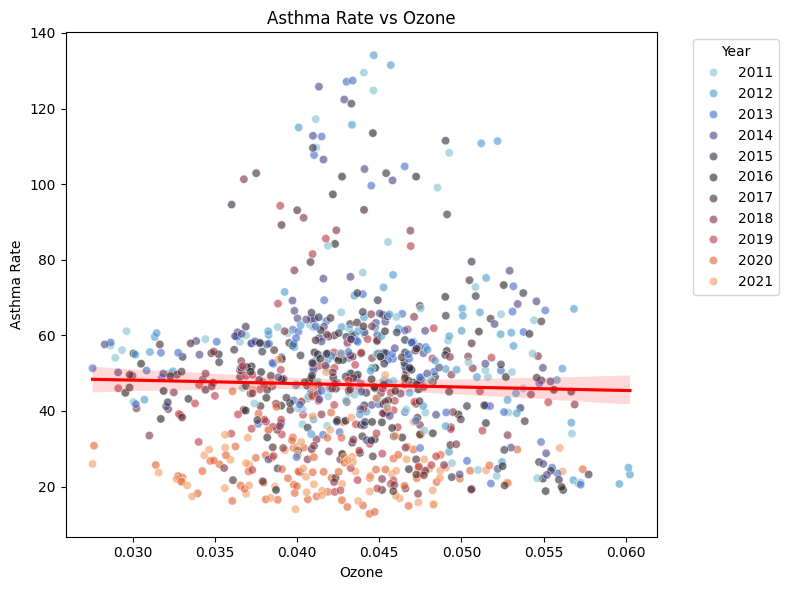

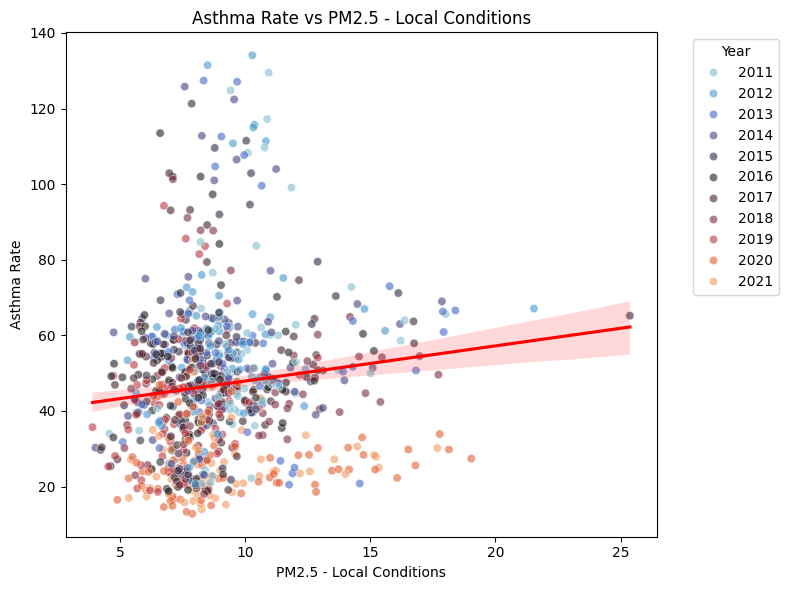

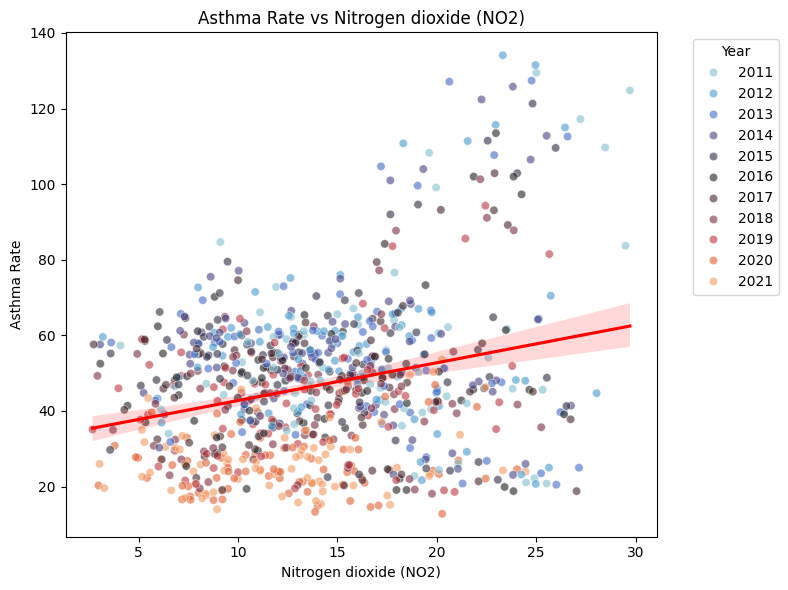

In [38]:
pollutants = ["Ozone", "PM2.5 - Local Conditions", "Nitrogen dioxide (NO2)"]

#loop through each pollutant and plot its relationship with asthma rate
for pollutant in pollutants:
  df_filtered = complete_panel[["Asthma Rate", pollutant, "Year"]].dropna()
  df_filtered["Year"] = df_filtered["Year"].astype(str)

  plt.figure(figsize=(8,6))
  sns.scatterplot(data=df_filtered, x=pollutant, y="Asthma Rate", hue="Year", palette="icefire", alpha=0.6)
  sns.regplot(data=df_filtered, x=pollutant, y="Asthma Rate", scatter=False, color="red")
  plt.title(f"Asthma Rate vs {pollutant}")
  plt.xlabel(pollutant)
  plt.ylabel("Asthma Rate")
  plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
  plt.tight_layout()

  filename = f"asthma_vs_{pollutant.replace(' ', '_').replace('(', '').replace(')', '')}.png"
  plt.savefig(filename, dpi=300, bbox_inches='tight')
  plt.show()

Scatterplots and regression analyses were conducted to evaluate the relationship between asthma emergency department (ER) visit rates and each of the three primary air pollutants: ozone(O3), fine partical matter (PM2.5), and nitrogen dioxide (NO2). Comparing asthma ER visit rates with pollutant levels revealed varying degrees of association.

Ozone, despite being a known respiratory irritant, exhibited a weak and statisically marginal relationship with asthma outcomes. This may be due in part to its higher rate of missing data in the EPA dataset, which limited the number of counties retained in the final dataset used and reduced the ability to detect stronger effects. PM2.5 also showed a slight positive trend, but this relationship was not statistically significant and may reflect the pollutant's more chronic health impacts, which are less likely to align with short-term emergency visit data. In contrast, nitrogen dioxide (NO2) displayed a clear and statistically positive association with asthma ER rates. The strength of this relationship was supported by both visual inspection and weighted least squares regression, identifying NO2 as the most consistent environmental predictor in the analysis.

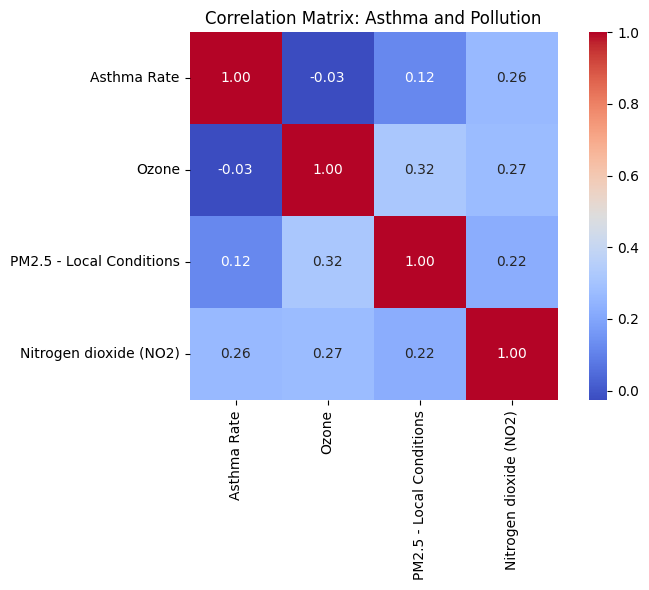

In [39]:
corr_vars = ["Asthma Rate", "Ozone", "PM2.5 - Local Conditions", "Nitrogen dioxide (NO2)"]
corr_df = complete_panel[corr_vars].dropna()

corr_matrix = corr_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix: Asthma and Pollution")
plt.tight_layout()
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

*Insert Text here later*

/tmp/ipython-input-3568659991.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: (g["Asthma Rate"] * g["Population raw value"]).sum() / g["Population raw value"].sum())
/tmp/ipython-input-3568659991.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=complete_panel, x="Year", y="Ozone", marker="o", ci=None, ax=axes[0,1])
/tmp/ipython-input-3568659991.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=complete_panel, x="Year", y="PM2.5 - Local Conditions", marker="o", ci=None, ax=axes[1,0])
/tmp/ipython-input-3568659991.py:29: FutureWarning: 

T

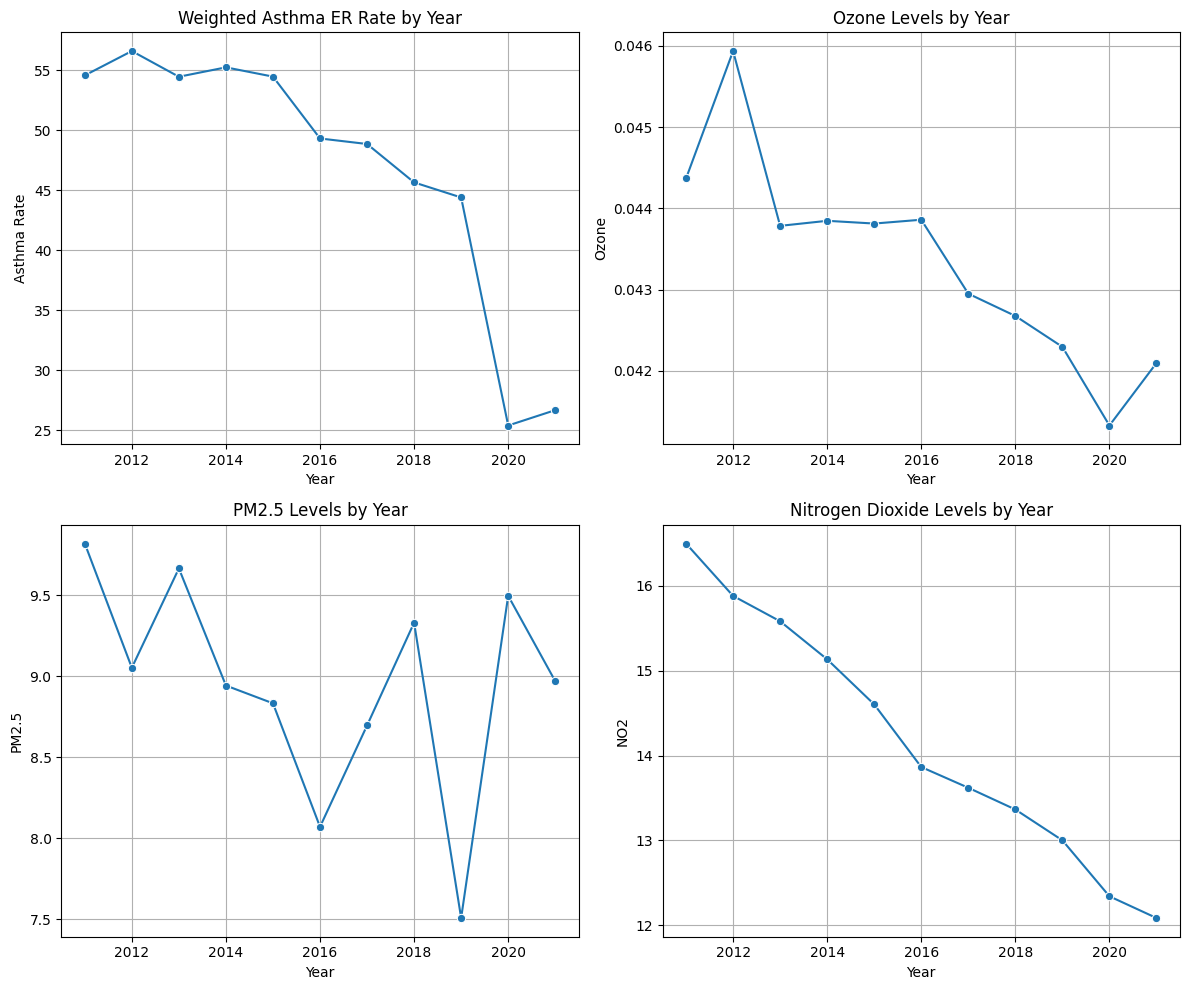

In [40]:
import matplotlib.pyplot as plt

weighted_trend = (
    complete_panel.groupby("Year")
    .apply(lambda g: (g["Asthma Rate"] * g["Population raw value"]).sum() / g["Population raw value"].sum())
    .reset_index(name="Weighted Asthma Rate")
)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.lineplot(data=weighted_trend, x="Year", y="Weighted Asthma Rate", marker="o", ax=axes[0,0])
axes[0,0].set_title("Weighted Asthma ER Rate by Year")
axes[0,0].set_ylabel("Asthma Rate")
axes[0,0].set_xlabel("Year")
axes[0,0].grid(True)

sns.lineplot(data=complete_panel, x="Year", y="Ozone", marker="o", ci=None, ax=axes[0,1])
axes[0,1].set_title("Ozone Levels by Year")
axes[0,1].set_ylabel("Ozone")
axes[0,1].set_xlabel("Year")
axes[0,1].grid(True)

sns.lineplot(data=complete_panel, x="Year", y="PM2.5 - Local Conditions", marker="o", ci=None, ax=axes[1,0])
axes[1,0].set_title("PM2.5 Levels by Year")
axes[1,0].set_ylabel("PM2.5")
axes[1,0].set_xlabel("Year")
axes[1,0].grid(True)

sns.lineplot(data=complete_panel, x="Year", y="Nitrogen dioxide (NO2)", marker="o", ci=None, ax=axes[1,1])
axes[1,1].set_title("Nitrogen Dioxide Levels by Year")
axes[1,1].set_ylabel("NO2")
axes[1,1].set_xlabel("Year")
axes[1,1].grid(True)


plt.tight_layout()
plt.savefig("combine_pollution_trends.png", dpi=300, bbox_inches='tight')
plt.show()


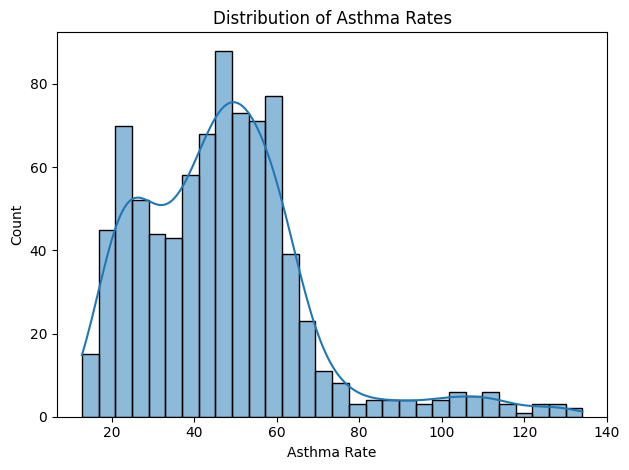

In [41]:
sns.histplot(data=complete_panel, x="Asthma Rate", kde=True, bins=30)
plt.title("Distribution of Asthma Rates")
plt.xlabel("Asthma Rate")
plt.tight_layout()
plt.show()

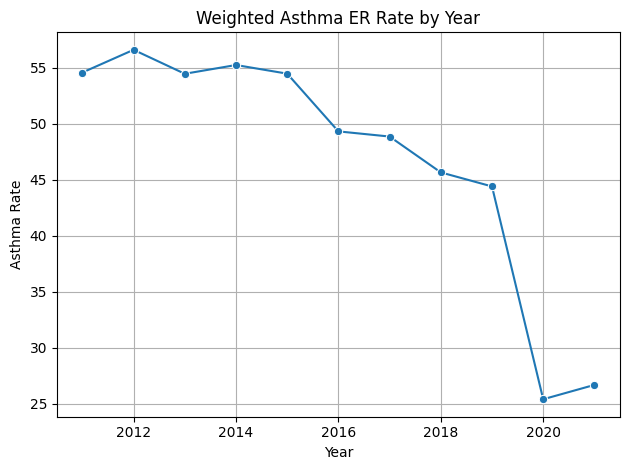

In [42]:
sns.lineplot(data=weighted_trend, x="Year", y="Weighted Asthma Rate", marker="o")
plt.title("Weighted Asthma ER Rate by Year")
plt.ylabel("Asthma Rate")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.savefig("weighted_asthma_er.png", dpi=300, bbox_inches='tight')
plt.show()

For n_clusters = 5, average silhouette score is 0.249


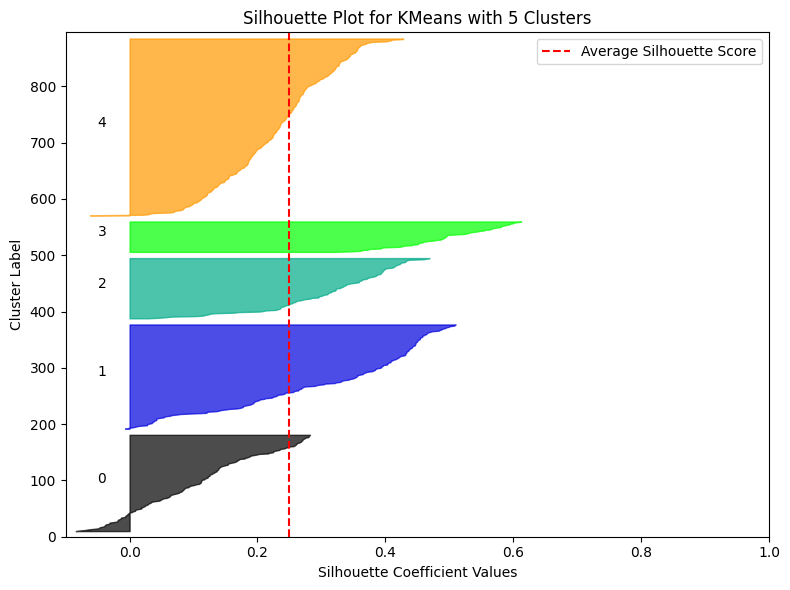

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

n_clusters = 5
kmeans5 = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels5 = kmeans5.fit_predict(X_cluster_scaled)

silhouette_avg = silhouette_score(X_cluster_scaled, labels5)
sample_silhouette_values = silhouette_samples(X_cluster_scaled, labels5)

print(f"For n_clusters = {n_clusters}, average silhouette score is {silhouette_avg:.3f}")

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X_cluster_scaled) + (n_clusters + 1) * 10])

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labels5 == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title(f"Silhouette Plot for KMeans with {n_clusters} Clusters")
ax1.set_xlabel("Silhouette Coefficient Values")
ax1.set_ylabel("Cluster Label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")
ax1.legend()
plt.tight_layout()
plt.savefig("silhouette_plot_k5.png", dpi=300)
plt.show()


In [45]:
from sklearn.cluster import KMeans

kmeans5 = KMeans(n_clusters=5, random_state=42, n_init=10)
cluster_labels5 = kmeans5.fit_predict(X_cluster_scaled)

clustered_df5 = complete_panel.copy().reset_index(drop=True)
clustered_df5["Cluster"] = cluster_labels5

cluster_summary5 = clustered_df5.groupby("Cluster")[features_for_clustering].mean().reset_index()
cluster_summary5



,Cluster,Ozone,PM2.5 - Local Conditions,Nitrogen dioxide (NO2),Asthma Rate,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic Black raw value,% Hispanic raw value,% Non-Hispanic White raw value,Median household income raw value,Children in poverty raw value,Some college raw value
0,0,0.040666,9.011421,17.612737,50.303488,2.200650e+06,0.207065,0.149910,0.082625,0.295349,0.382423,93185.511628,0.132174,0.720512
1,1,0.047230,11.357540,14.922321,50.840323,6.797063e+05,0.272076,0.130032,0.065282,0.550932,0.297396,58665.467742,0.237398,0.517471
2,2,0.040688,8.767392,15.012130,61.109259,4.533090e+05,0.222288,0.152040,0.389522,0.085146,0.472610,57332.111111,0.235176,0.624894
3,3,0.050549,8.245566,18.994978,20.792727,5.081310e+05,0.298405,0.102222,0.011693,0.141615,0.788704,76414.200000,0.088800,0.720520
4,4,0.042203,7.665678,10.740530,42.508889,3.970678e+05,0.213739,0.176652,0.048660,0.163778,0.709940,70592.190476,0.145517,0.695318


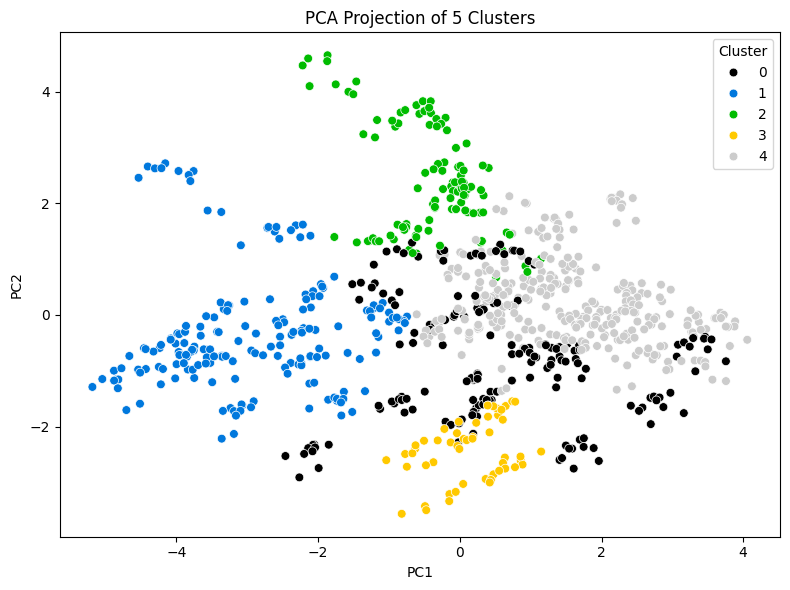

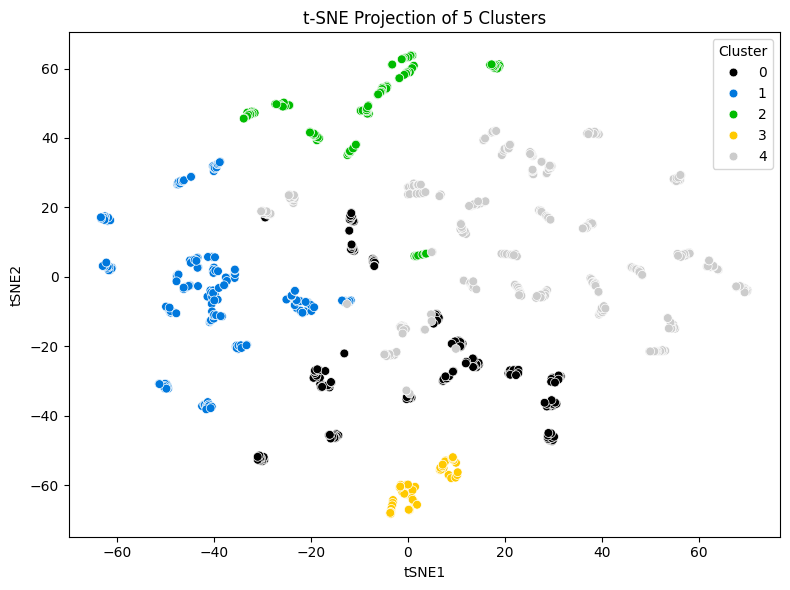

In [46]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# PCA visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_cluster_scaled)
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["Cluster"] = cluster_labels5

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="nipy_spectral", s=40)
plt.title("PCA Projection of 5 Clusters")
plt.tight_layout()
plt.savefig("pca_5clusters.png", dpi=300)
plt.show()

# t-SNE visualization
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
tsne_result = tsne.fit_transform(X_cluster_scaled)
tsne_df = pd.DataFrame(tsne_result, columns=["tSNE1", "tSNE2"])
tsne_df["Cluster"] = cluster_labels5

plt.figure(figsize=(8,6))
sns.scatterplot(data=tsne_df, x="tSNE1", y="tSNE2", hue="Cluster", palette="nipy_spectral", s=40)
plt.title("t-SNE Projection of 5 Clusters")
plt.tight_layout()
plt.savefig("tsne_5clusters.png", dpi=300)
plt.show()


In [48]:
import pandas as pd

k4 = cluster_summary.set_index("Cluster").T
k5 = cluster_summary5.set_index("Cluster").T

k4.columns = pd.MultiIndex.from_product([k4.columns.astype(int), ["k4"]])
k5.columns = pd.MultiIndex.from_product([k5.columns.astype(int), ["k5"]])

comp = pd.concat([k4, k5], axis=1)
clusters_union = sorted(set(list(k4.columns.get_level_values(0)) + list(k5.columns.get_level_values(0))))
comp = comp.reindex(columns=pd.MultiIndex.from_product([clusters_union, ["k4", "k5"]]))

comp.round(3)



0                        1  \
                                           k4           k5          k4   
Ozone                                   0.041        0.041       0.048   
PM2.5 - Local Conditions                7.930        9.011      11.475   
Nitrogen dioxide (NO2)                 11.403       17.613      14.405   
Asthma Rate                            43.235       50.303      47.981   
Population raw value               528460.426  2200649.605  641978.545   
% below 18 years of age raw value       0.212        0.207       0.273   
% 65 and older raw value                0.173        0.150       0.130   
% Non-Hispanic Black raw value          0.055        0.083       0.052   
% Hispanic raw value                    0.181        0.295       0.550   
% Non-Hispanic White raw value          0.644        0.382       0.309   
Median household income raw value   77339.196    93185.512   59597.264   
Children in poverty raw value           0.137        0.132       0.230   
Some college raw value                  0.705        0.721       0.519   

                                                        2              \
                                           k5          k4          k5   
Ozone                                   0.047       0.041       0.041   
PM2.5 - Local Conditions               11.358       8.625       8.767   
Nitrogen dioxide (NO2)                 14.922      17.198      15.012   
Asthma Rate                            50.840      68.414      61.109   
Population raw value               679706.349  678356.493  453308.991   
% below 18 years of age raw value       0.272       0.217       0.222   
% 65 and older raw value                0.130       0.147       0.152   
% Non-Hispanic Black raw value          0.065       0.332       0.390   
% Hispanic raw value                    0.551       0.166       0.085   
% Non-Hispanic White raw value          0.297       0.418       0.473   
Median household income raw value   58665.468   60077.393   57332.111   
Children in poverty raw value           0.237       0.235       0.235   
Some college raw value                  0.517       0.635       0.625   

                                             3               4              
                                            k4          k5  k4          k5  
Ozone                                    0.048       0.051 NaN       0.042  
PM2.5 - Local Conditions                 8.945       8.246 NaN       7.666  
Nitrogen dioxide (NO2)                  19.669      18.995 NaN      10.741  
Asthma Rate                             29.505      20.793 NaN      42.509  
Population raw value               2532374.703  508131.000 NaN  397067.768  
% below 18 years of age raw value        0.259       0.298 NaN       0.214  
% 65 and older raw value                 0.125       0.102 NaN       0.177  
% Non-Hispanic Black raw value           0.029       0.012 NaN       0.049  
% Hispanic raw value                     0.243       0.142 NaN       0.164  
% Non-Hispanic White raw value           0.591       0.789 NaN       0.710  
Median household income raw value    83308.928   76414.200 NaN   70592.190  
Children in poverty raw value            0.112       0.089 NaN       0.146  
Some college raw value                   0.711       0.721 NaN       0.695

In [49]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np

dbscan_full = DBSCAN(eps=3, min_samples=5)
db_labels_full = dbscan_full.fit_predict(X_cluster_scaled)

dbscan_full_df = complete_panel.copy().reset_index(drop=True)
dbscan_full_df["DBSCAN_Cluster"] = db_labels_full

dbscan_summary_full = (
    dbscan_full_df[dbscan_full_df["DBSCAN_Cluster"] != -1]
    .groupby("DBSCAN_Cluster")[features_for_clustering]
    .mean()
    .round(2)
)

print("Cluster counts (including noise):")
print(pd.Series(db_labels_full).value_counts().sort_index())
print("\nMean variable summary by DBSCAN cluster:")
display(dbscan_summary_full)


Cluster counts (including noise):
0    825
1     11
Name: count, dtype: int64

Mean variable summary by DBSCAN cluster:


,Ozone,PM2.5 - Local Conditions,Nitrogen dioxide (NO2),Asthma Rate,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic Black raw value,% Hispanic raw value,% Non-Hispanic White raw value,Median household income raw value,Children in poverty raw value,Some college raw value
DBSCAN_Cluster,,,,,,,,,,,,,
0,0.04,8.91,14.07,47.01,723015.59,0.23,0.15,0.10,0.26,0.53,71237.51,0.17,0.65
1,0.05,11.68,22.05,41.92,10039107.00,0.21,0.14,0.08,0.49,0.26,72721.00,0.18,0.64
